# Credit Card Fraud Detection

## Problem Statement

To predict fraudulent credit card transactions with the help of machine learning models.

## Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

## Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

## Project pipeline

- Data Understanding
- Exploratory data analytics (EDA)
- Train/Test split
- Model building / hyperparameter tuning
- Model evaluation

## Libraries

In [2]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from xgboost import XGBClassifier
from imblearn import over_sampling

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Note:
- Time: contains the seconds elapsed between the first transaction in the data set and the subsequent transactions
- features (V1, V2, V3, up to V28): Already modified with principal component analysis (PCA) to maintain confidentiality
- Amount: Transaction amount
- Class: Represents class labeling

## Exploratory data analysis

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Note: seems like there is no missing values in the data set

In [8]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('classes =', classes)
print('Normal share =', normal_share)
print('Fraud share =', fraud_share)

classes = Class
0    284315
1       492
Name: count, dtype: int64
Normal share = 99.82725143693798
Fraud share = 0.1727485630620034


In [10]:
# set sns style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

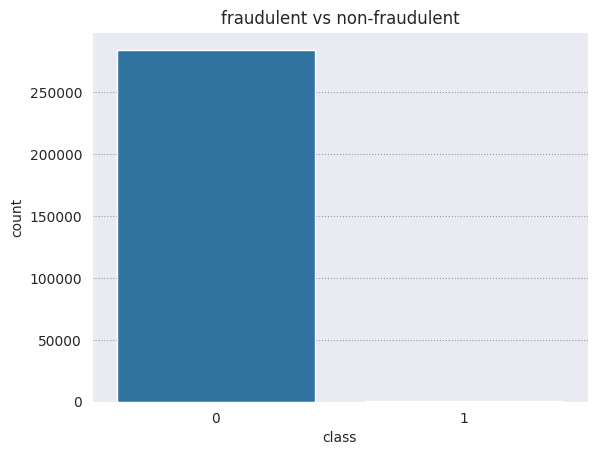

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title("fraudulent vs non-fraudulent")
plt.xlabel("class")
plt.ylabel("count")
plt.show()


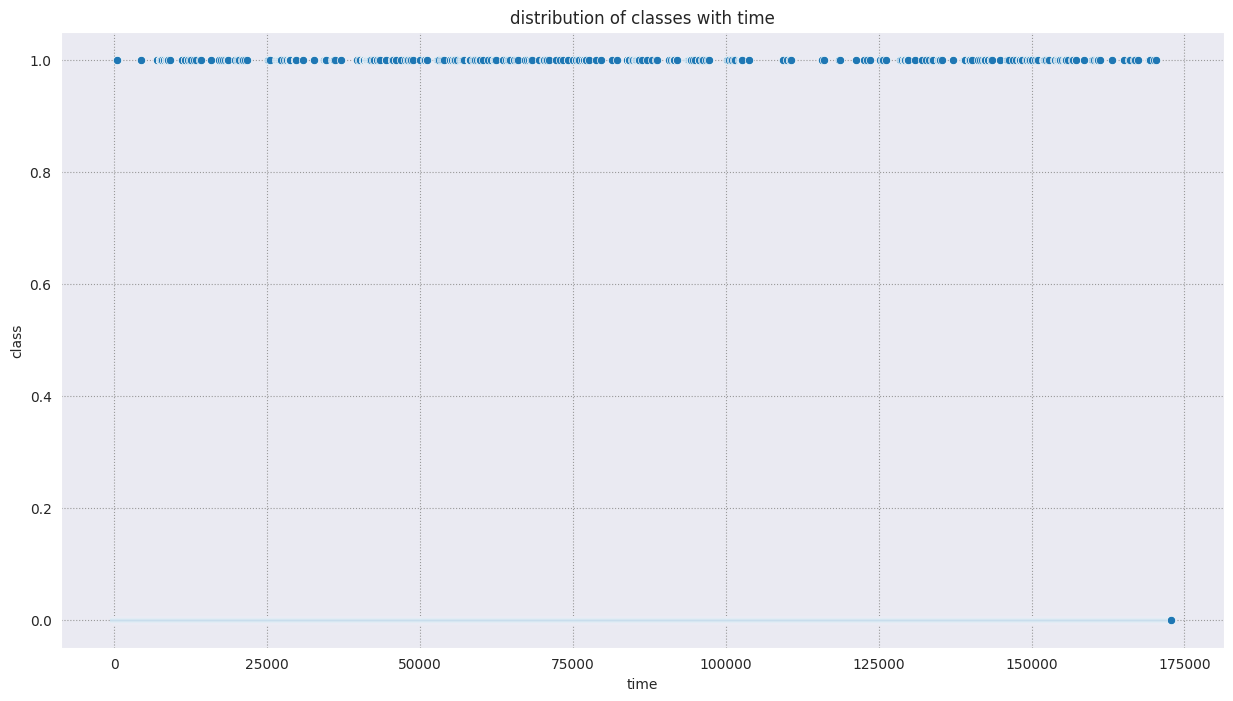

In [12]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Time'], y='Class', data=df)
plt.title("distribution of classes with time")
plt.xlabel("time")
plt.ylabel("class")
plt.show()

### Insight: Fradulent transaction happening irrespective of time

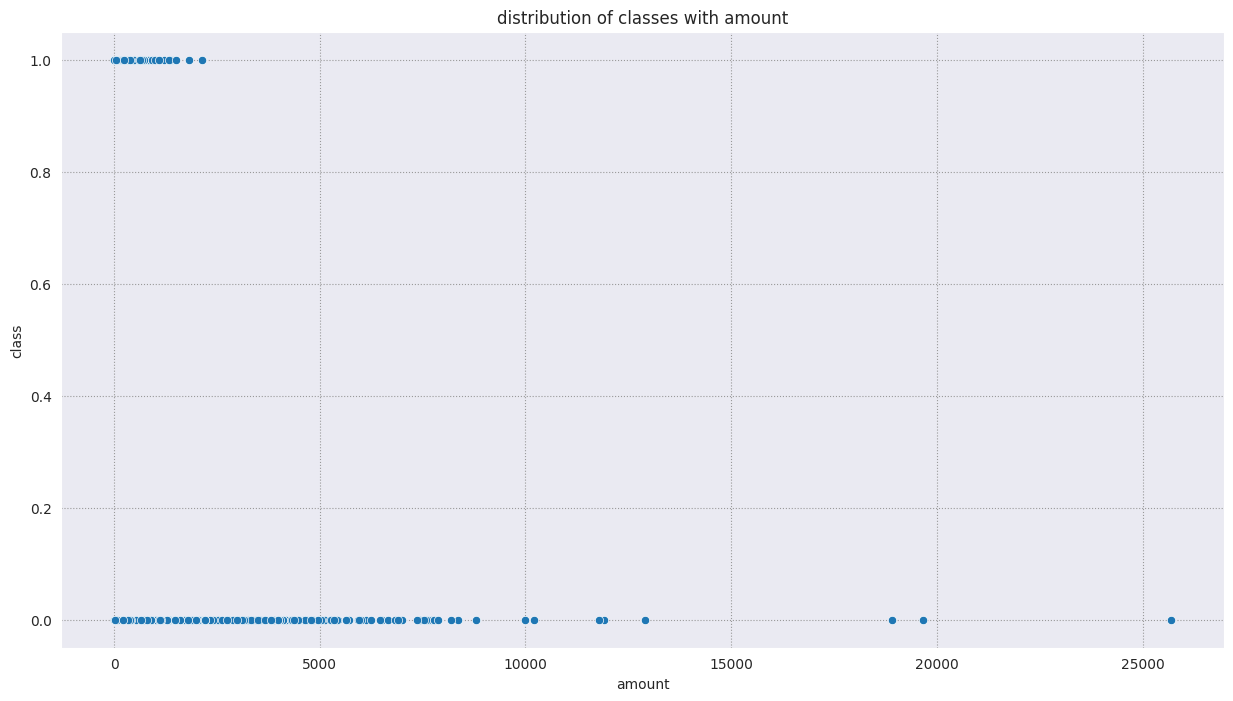

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Amount'], y='Class', data=df)
plt.title("distribution of classes with amount")
plt.xlabel("amount")
plt.ylabel("class")
plt.show()

### Insight: All the fradulent transaction are of lower amount (less than 5000) for the given data set

In [14]:
# Drop unnecessary columns
# Lets remove the time column, as its look not important for detecting the fradulent transactions
df.drop('Time', axis = 1, inplace= True)

In [15]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Splitting the data into train & test data

In [16]:
y= df['Class']
X= df.drop('Class', axis=1)

In [17]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=100, test_size=0.20)

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

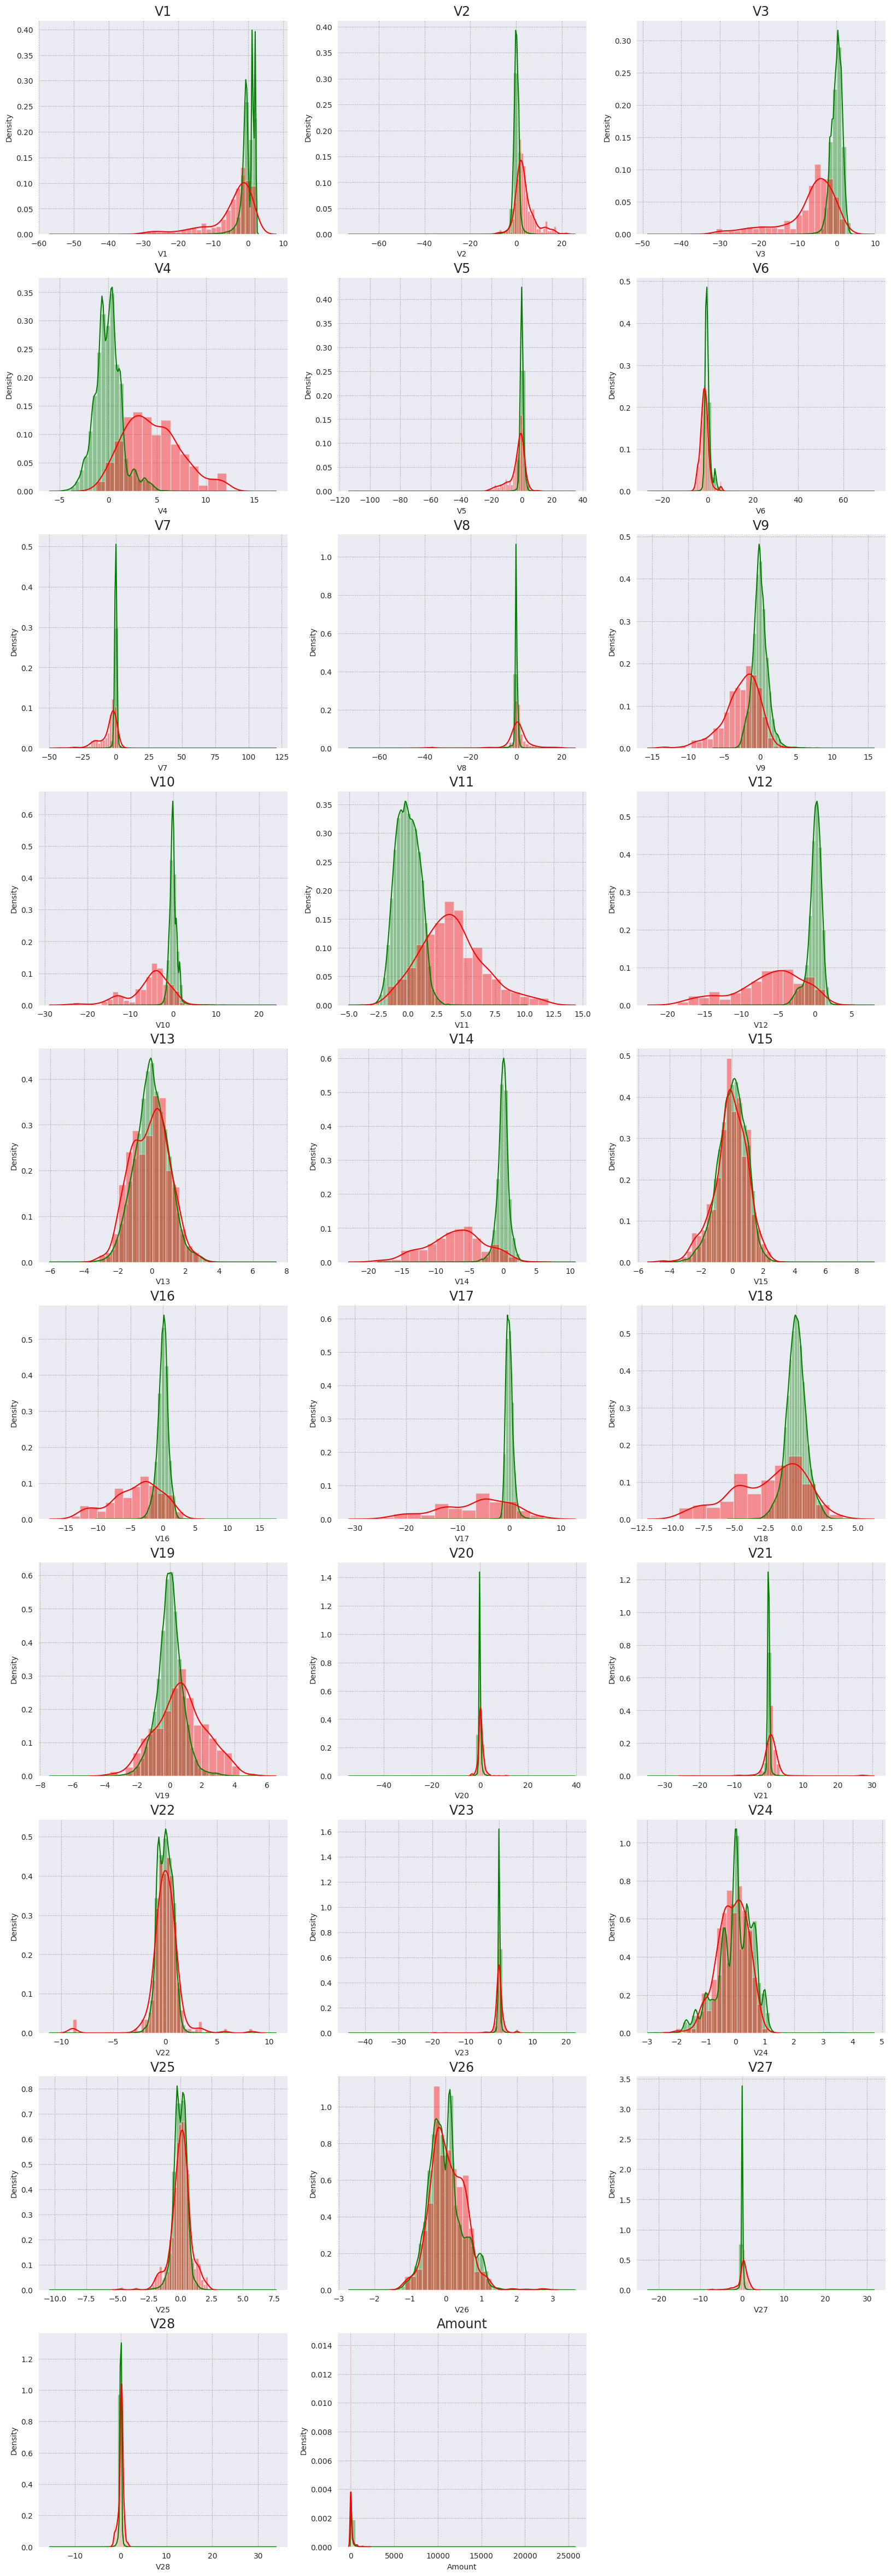

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [21]:
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

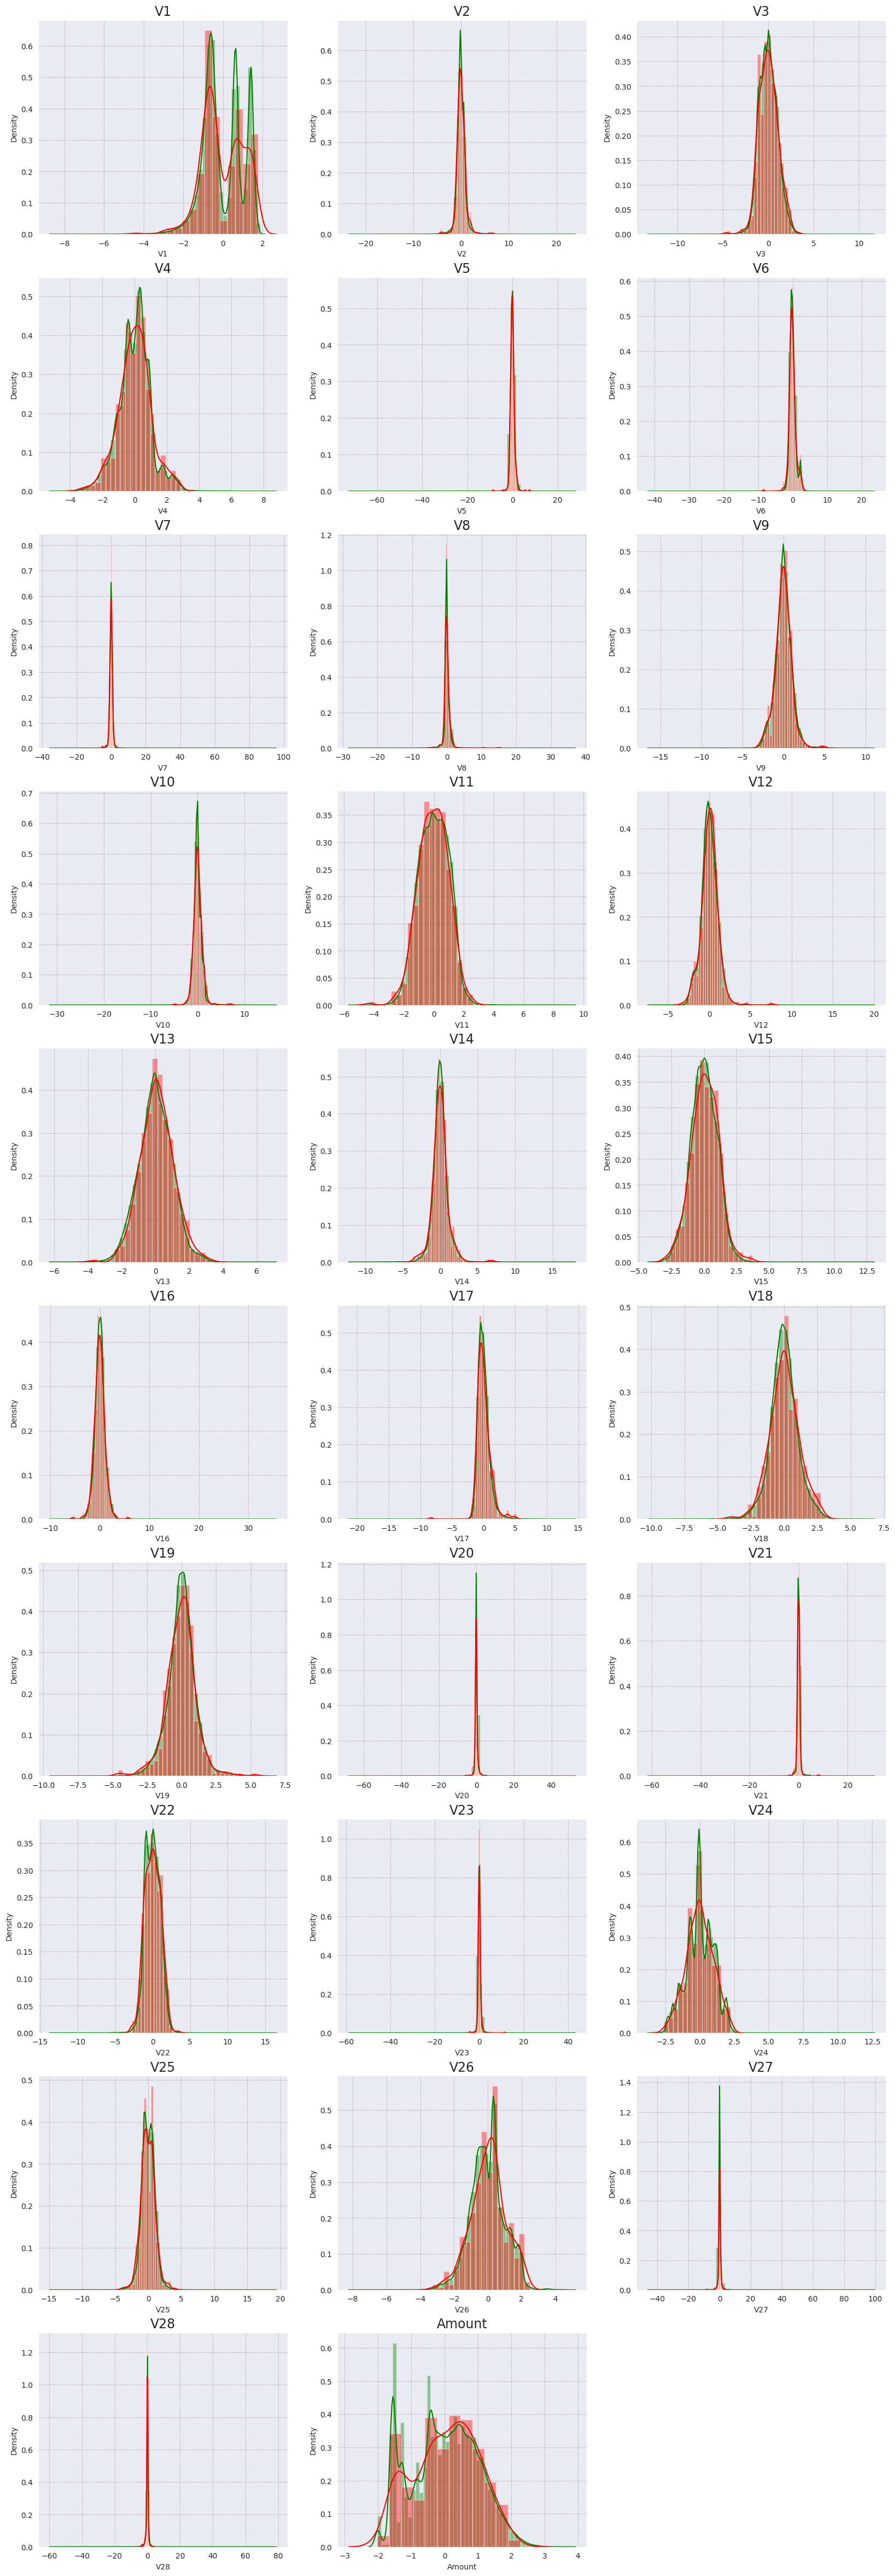

In [22]:
# plot the histogram of a variable from the dataset again to see the result
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building with unbalance class
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [23]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [24]:
def print_classification_data(actual, pred):
    # Model classification report
    report = metrics.classification_report(actual, pred)
    print(report)

    # Display Confusion matrix
    cm = metrics.confusion_matrix(actual, pred)
    cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Non-Fraudulent', 'Fradulent'])
    cm_display.plot()
    plt.title('Confusion Matrix')
    plt.xticks(rotation=90)
    plt.show()

In [25]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV.fit(X_train, y_train)

  #find predicted values
  y_pred = searchCV.predict(X_test)

  #Find predicted probabilities
  y_pred_probs = searchCV.predict_proba(X_test)[:,1]

  # Accuaracy of models
  Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

  print("Accuarcy of Logistic model : {0}".format(Accuracy))

  print_classification_data(y_test, y_pred)

  roc_value = metrics.roc_auc_score(y_test, y_pred_probs)
  print("roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression','Accuracy': Accuracy,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

Logistic Regression
Accuarcy of Logistic model : 0.9989642217618764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962



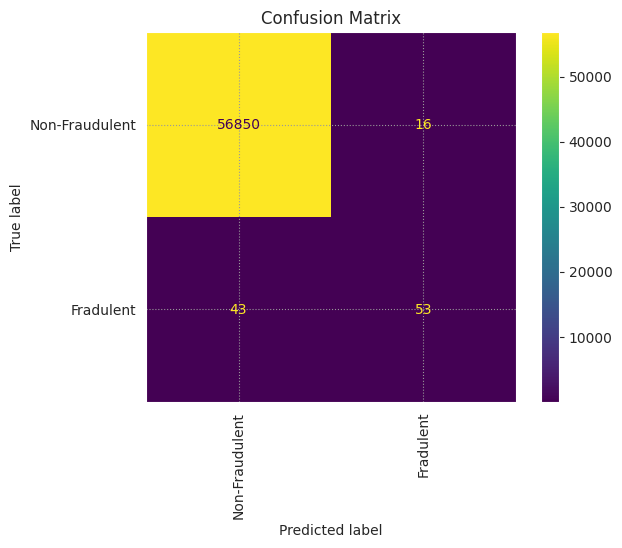

roc_value: 0.9663073057714628
threshold: 0.0010291757405214417
ROC for the test dataset 96.6%


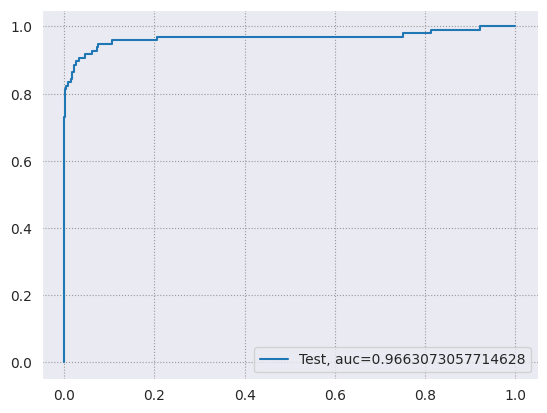

Time Taken by Model: --- 46.13815236091614 seconds ---
--------------------------------------------------------------------------------


In [26]:
print("Logistic Regression")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### KNN

In [27]:
def buildAndRunKNNModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test ):
  #create KNN model and fit the model with train dataset
  knn = neighbors.KNeighborsClassifier(n_neighbors = 5, n_jobs=16)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)

  #find accuracy of the model
  score = knn.score(X_test,y_test)
  print("KNN Accuarcy : {0}".format(score))

  print_classification_data(y_test, y_pred)

  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = metrics.roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)

  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

KNN Model
KNN Accuarcy : 0.9993504441557529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



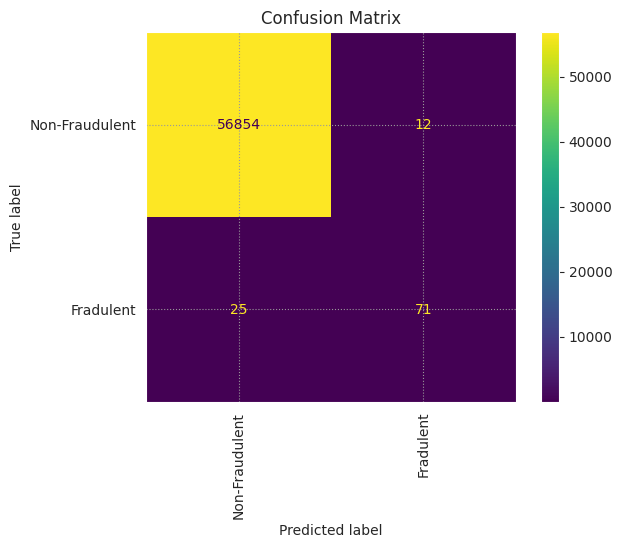

KNN roc_value: 0.9008513435093026
KNN threshold: 0.2
ROC for the test dataset 90.1%


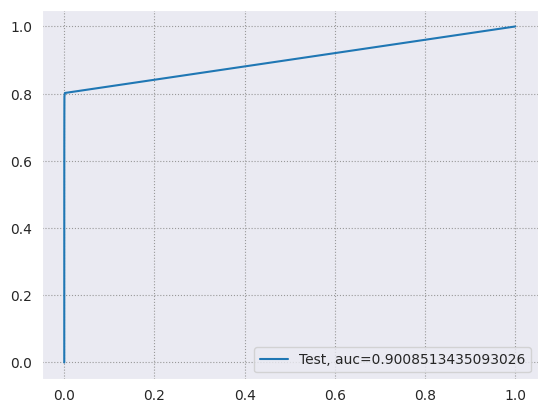

Time Taken by Model: --- 53.39972472190857 seconds ---
--------------------------------------------------------------------------------


In [28]:
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [29]:
df_Results

Data_Imbalance_Handiling                Model  Accuracy  roc_value  \
0        Power Transformer  Logistic Regression  0.998964   0.966307   
1        Power Transformer                  KNN  0.999350   0.900851   

   threshold  
0   0.001029  
1   0.200000

### SVM

In [30]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  clf = svm.SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = metrics.accuracy_score(y_test, y_pred_SVM)
  print("SVM accuracy_score : {0}".format(SVM_Score))

  print_classification_data(y_test, y_pred_SVM)

  # Run classifier
  classifier = svm.SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = metrics.roc_auc_score(y_test, svm_probs)
  print("SVM roc_value: {0}" .format(roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)

  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

SVM Model with Sigmoid Kernel
SVM accuracy_score : 0.9985779993679997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962



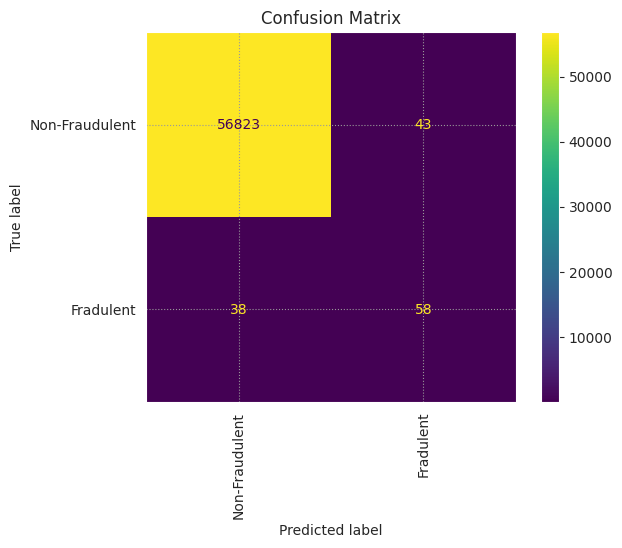

SVM roc_value: 0.8876203120786879
SVM threshold: 0.0012149258647577027
ROC for the test dataset 88.8%


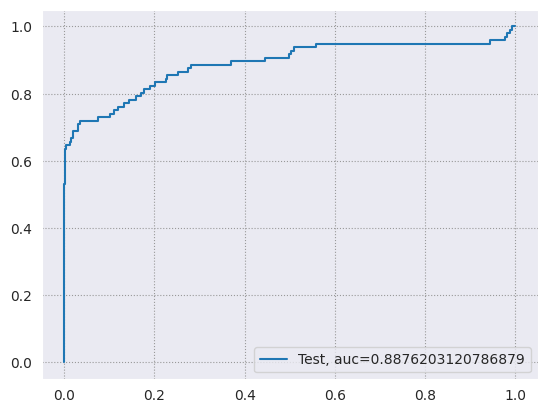

Time Taken by Model: --- 88.70446586608887 seconds ---


In [31]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Power Transformer",X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [32]:
# Print result
df_Results

Data_Imbalance_Handiling                Model  Accuracy  roc_value  \
0        Power Transformer  Logistic Regression  0.998964   0.966307   
1        Power Transformer                  KNN  0.999350   0.900851   
2        Power Transformer                  SVM  0.998578   0.887620   

   threshold  
0   0.001029  
1   0.200000  
2   0.001215

### Decision Tree

In [33]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
      dt = tree.DecisionTreeClassifier(criterion = c, random_state=42)
      dt.fit(X_train, y_train)
      y_pred = dt.predict(X_test)

      test_score = dt.score(X_test, y_test)
      print(c + " score: {0}" .format(test_score))

      print_classification_data(y_test, y_pred)

      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = metrics.roc_auc_score(y_test, tree_preds)
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))

      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)

      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))

      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993328885924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.75      0.72        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



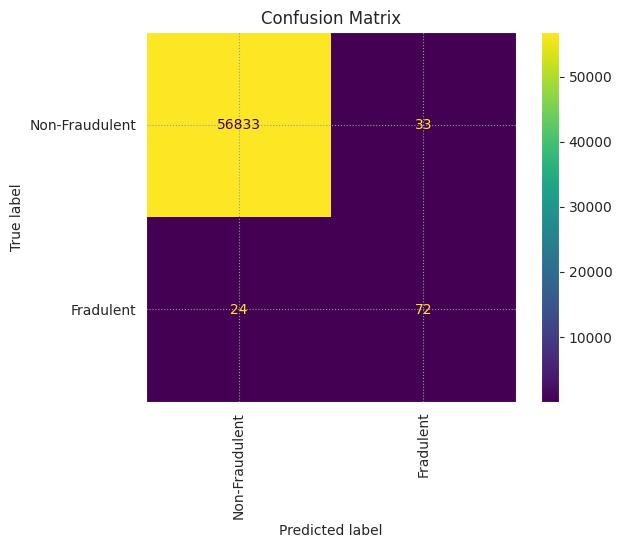

gini tree_roc_value: 0.8747098441951253
Tree threshold: 1.0
ROC for the test dataset 87.5%


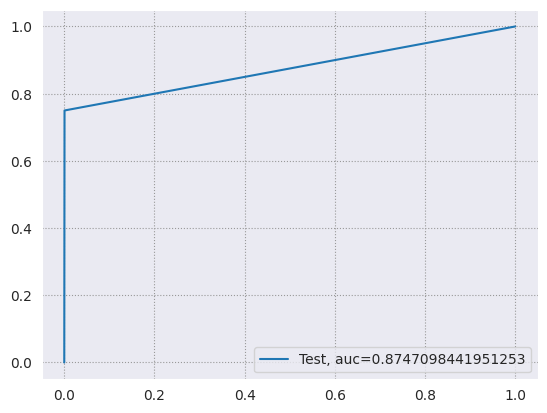

entropy score: 0.9991046662687406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



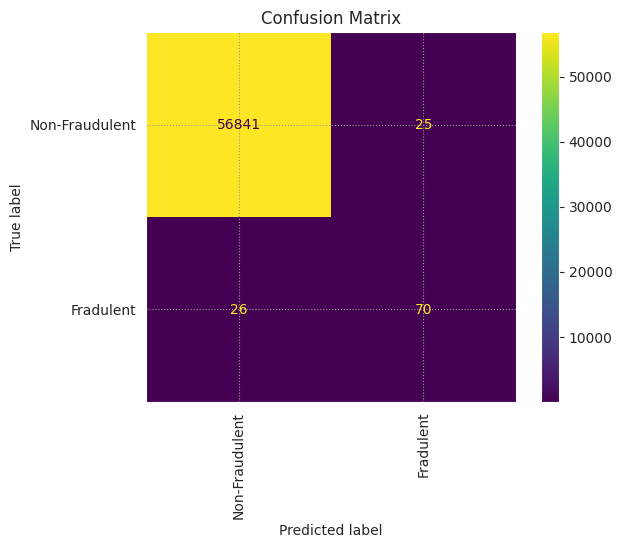

entropy tree_roc_value: 0.8643635183296404
Tree threshold: 1.0
ROC for the test dataset 86.4%


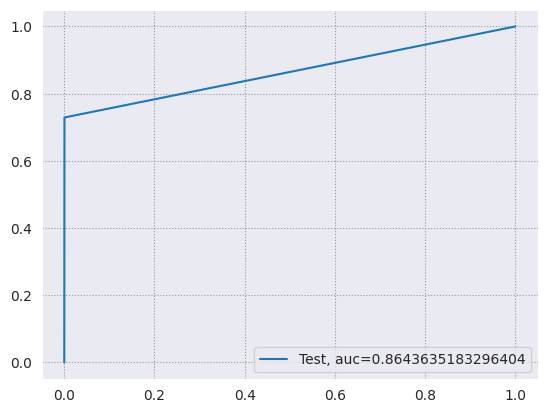

Time Taken by Model: --- 28.59289312362671 seconds ---
--------------------------------------------------------------------------------


In [34]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [35]:
# Print result
df_Results

Data_Imbalance_Handiling                             Model  Accuracy  \
0        Power Transformer               Logistic Regression  0.998964   
1        Power Transformer                               KNN  0.999350   
2        Power Transformer                               SVM  0.998578   
3        Power Transformer     Tree Model with gini criteria  0.998999   
4        Power Transformer  Tree Model with entropy criteria  0.999105   

   roc_value  threshold  
0   0.966307   0.001029  
1   0.900851   0.200000  
2   0.887620   0.001215  
3   0.874710   1.000000  
4   0.864364   1.000000

### Random Forest

In [36]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 100 trees
  RF_model = ensemble.RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)

  RF_test_score = RF_model.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(RF_test_score))

  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print_classification_data(y_test, rf_predictions)

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = metrics.roc_auc_score(y_test, rf_probs)
  print("Random Forest roc_value: {0}" .format(roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)

  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

Random Forest Model
Model Accuracy: 0.9993504441557529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



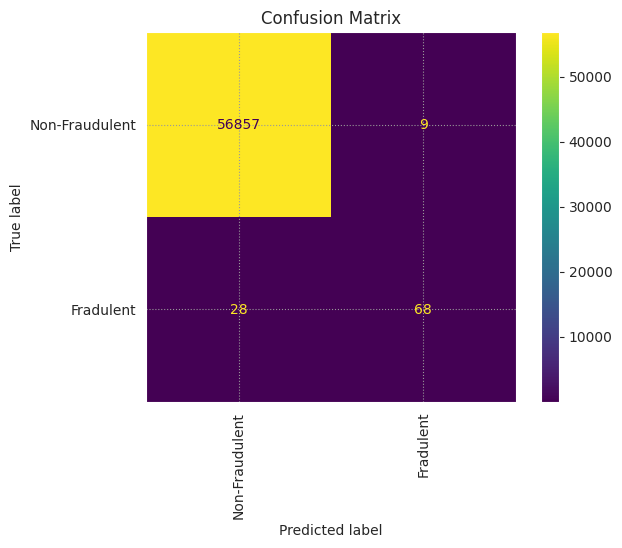

Random Forest roc_value: 0.9250142330214891
Random Forest threshold: 0.01
ROC for the test dataset 92.5%


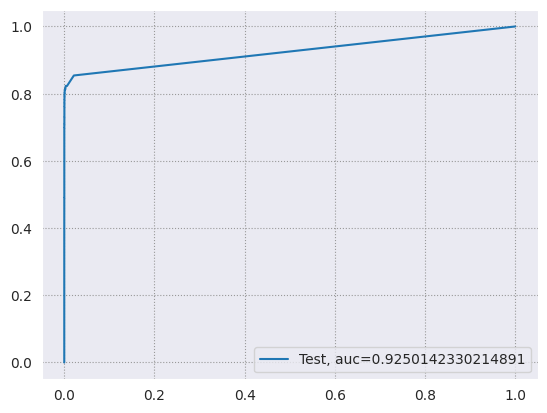

Time Taken by Model: --- 194.66129803657532 seconds ---
--------------------------------------------------------------------------------


In [37]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [38]:
df_Results

Data_Imbalance_Handiling                             Model  Accuracy  \
0        Power Transformer               Logistic Regression  0.998964   
1        Power Transformer                               KNN  0.999350   
2        Power Transformer                               SVM  0.998578   
3        Power Transformer     Tree Model with gini criteria  0.998999   
4        Power Transformer  Tree Model with entropy criteria  0.999105   
5        Power Transformer                     Random Forest  0.999350   

   roc_value  threshold  
0   0.966307   0.001029  
1   0.900851   0.200000  
2   0.887620   0.001215  
3   0.874710   1.000000  
4   0.864364   1.000000  
5   0.925014   0.010000

### XG Boost

In [39]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)

  # Accuracy score
  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  # Prediction
  y_pred = XGBmodel.predict(X_test)

  print_classification_data(y_test, y_pred)

  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
  print("XGboost roc_value: {0}" .format(XGB_roc_value))

  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)

  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)

  return df_Results

XGBoost Model
Model Accuracy: 0.999420666409185
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



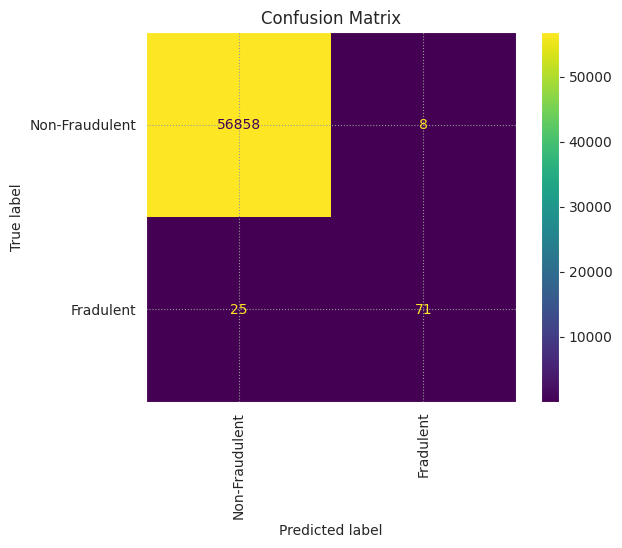

XGboost roc_value: 0.9723599118981465
XGBoost threshold: 3.55349293386098e-05
ROC for the test dataset 97.2%


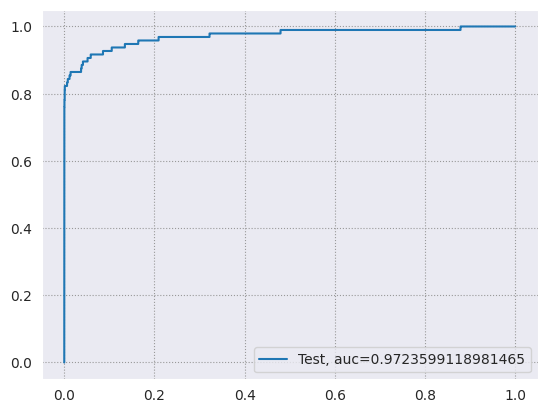

Time Taken by Model: --- 1.6991729736328125 seconds ---
--------------------------------------------------------------------------------


In [40]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Power Transformer", X_train_pt_df, y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [41]:
df_Results

Data_Imbalance_Handiling                             Model  Accuracy  \
0        Power Transformer               Logistic Regression  0.998964   
1        Power Transformer                               KNN  0.999350   
2        Power Transformer                               SVM  0.998578   
3        Power Transformer     Tree Model with gini criteria  0.998999   
4        Power Transformer  Tree Model with entropy criteria  0.999105   
5        Power Transformer                     Random Forest  0.999350   
6        Power Transformer                           XGBoost  0.999421   

   roc_value  threshold  
0   0.966307   0.001029  
1   0.900851   0.200000  
2   0.887620   0.001215  
3   0.874710   1.000000  
4   0.864364   1.000000  
5   0.925014   0.010000  
6   0.972360   0.000036

### Perform cross validation

In [42]:
#Lets perfrom StratifiedKFold and check the results
skf = model_selection.StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [43]:
print(np.sum(y))
print(np.sum(y_train_SKF_cv))
print(np.sum(y_test_SKF_cv))

492
394
98


### Models with StratifiedKFold

Logistic Regression
Accuarcy of Logistic model : 0.998771088990713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961



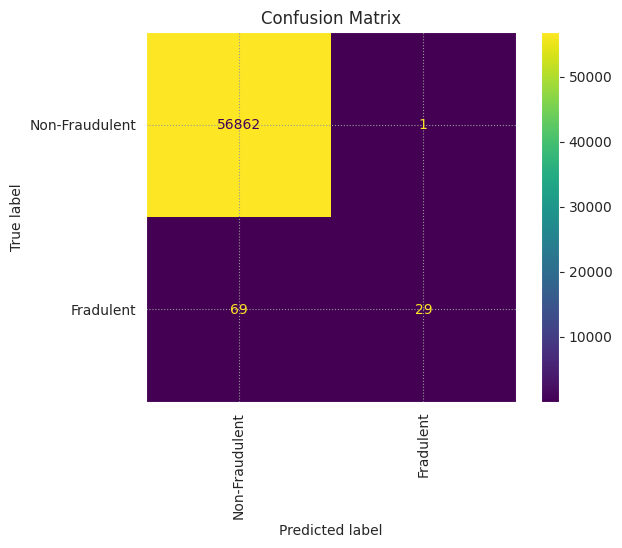

roc_value: 0.9833348108073576
threshold: 0.001581073095925817
ROC for the test dataset 98.3%


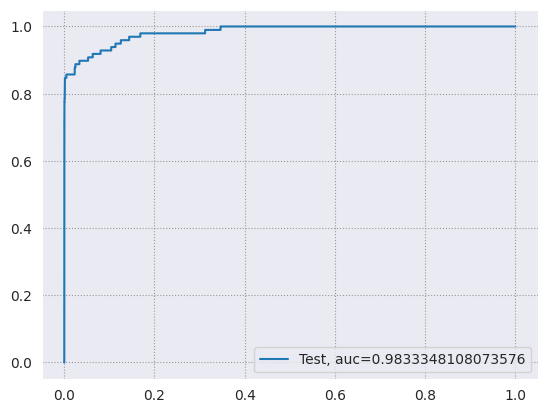

Time Taken by Model: --- 152.90801453590393 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuarcy : 0.9991222064219378
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961



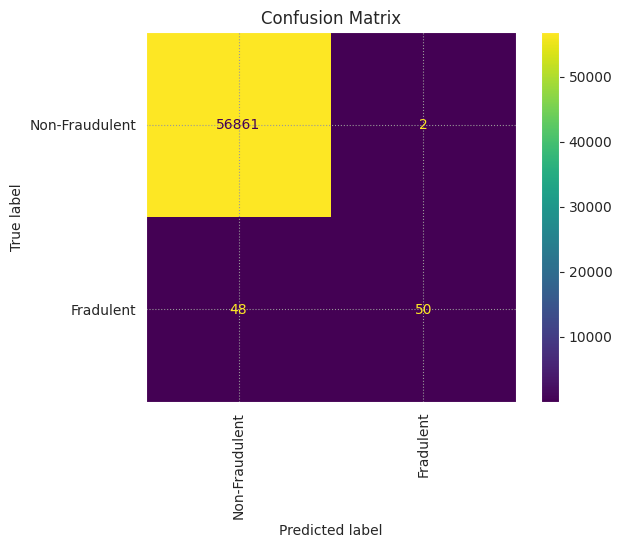

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


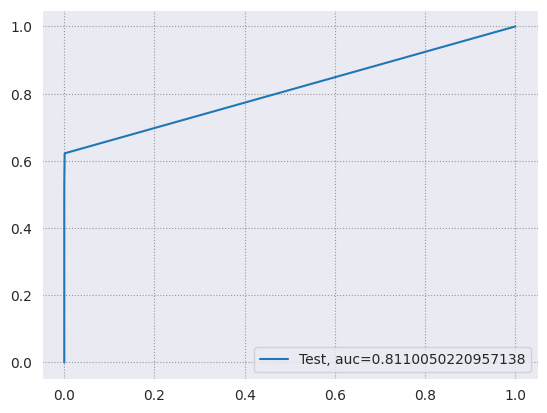

Time Taken by Model: --- 52.4636549949646 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
SVM accuracy_score : 0.9982795245869981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



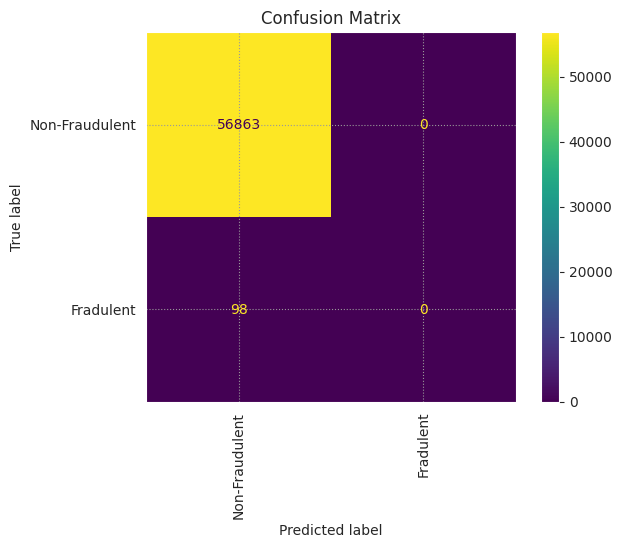

SVM roc_value: 0.40214557940370105
SVM threshold: 0.0017447632388313615
ROC for the test dataset 40.2%


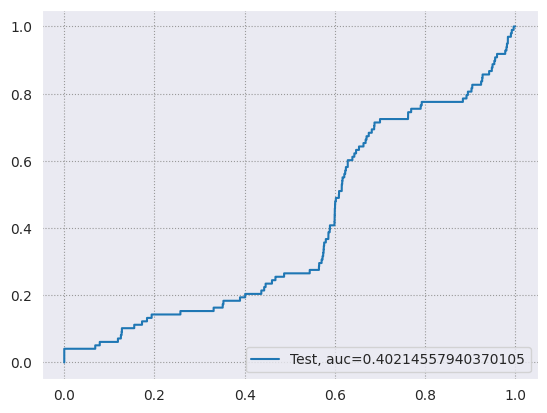

Time Taken by Model: --- 452.4545543193817 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961



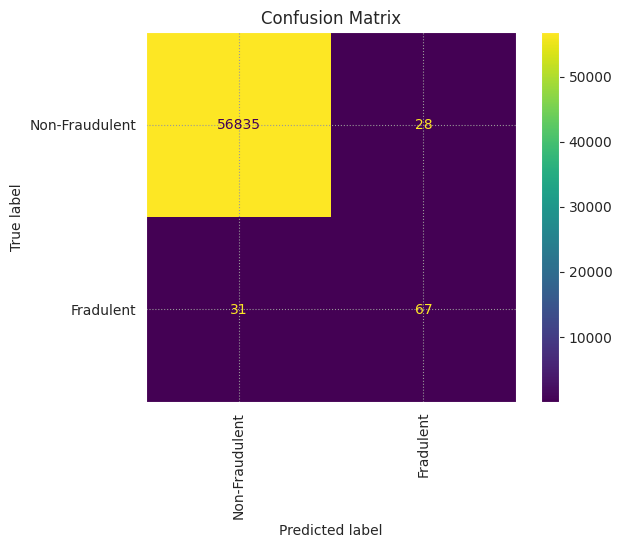

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


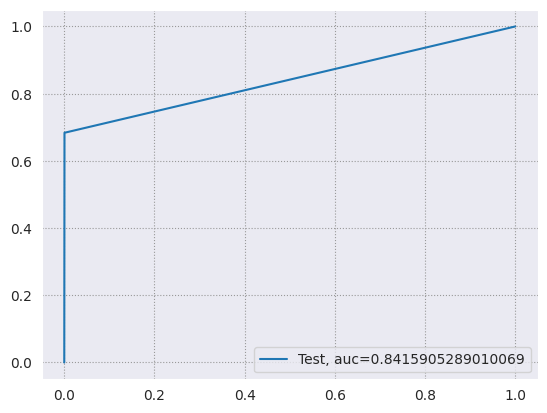

entropy score: 0.9990870946788153
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961



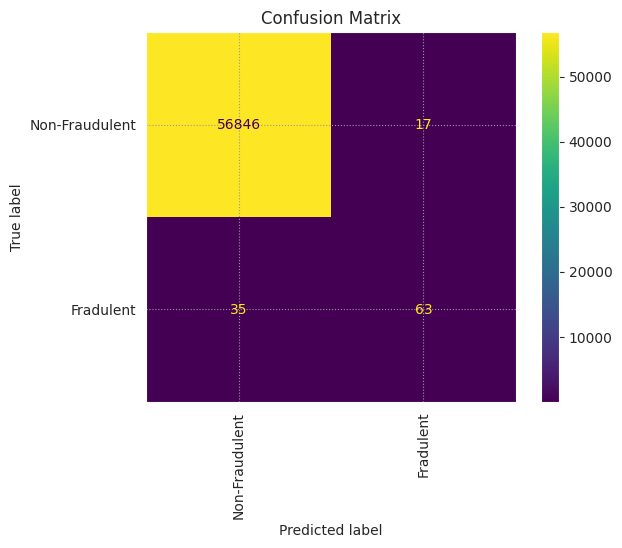

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


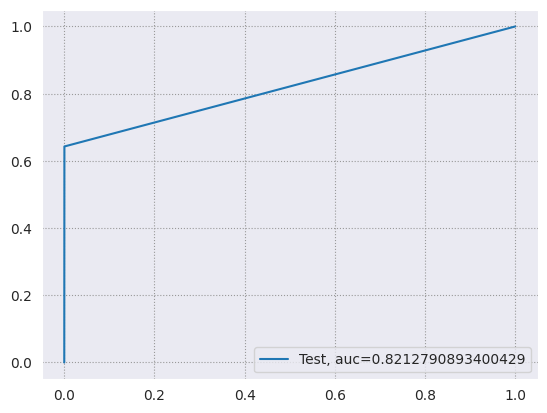

Time Taken by Model: --- 27.88413143157959 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961



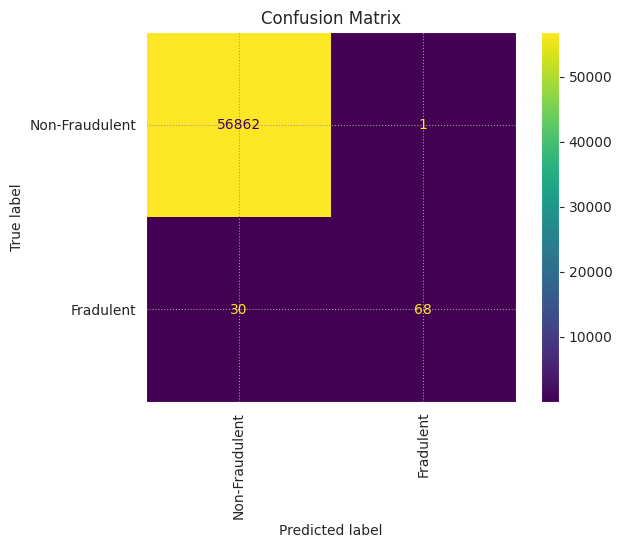

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


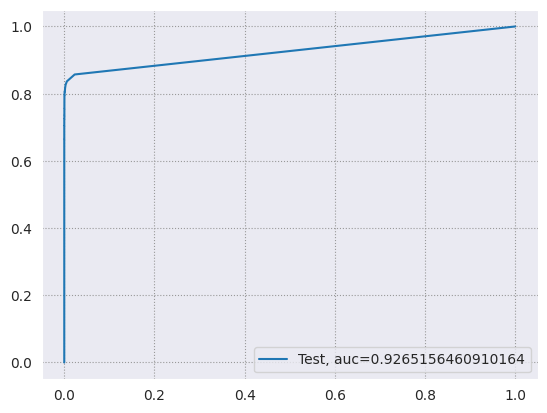

Time Taken by Model: --- 177.07872915267944 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961



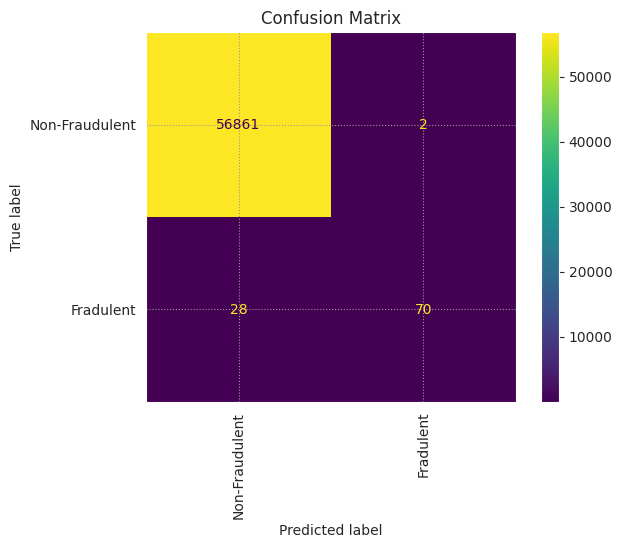

XGboost roc_value: 0.9812878213909766
XGBoost threshold: 6.587481766473502e-05
ROC for the test dataset 98.1%


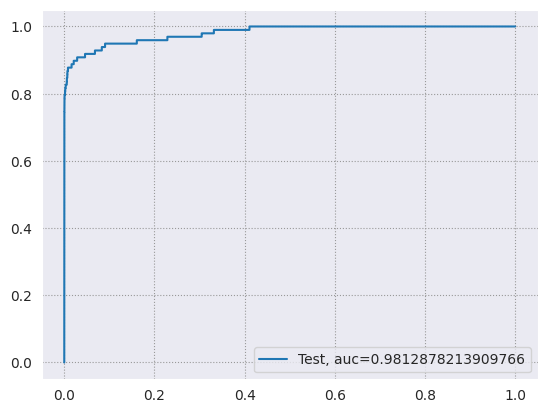

Time Taken by Model: --- 1.5384111404418945 seconds ---
--------------------------------------------------------------------------------


In [44]:
#Run Logistic Regression
print("Logistic Regression")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [45]:
df_Results

Data_Imbalance_Handiling                             Model  \
0                  Power Transformer               Logistic Regression   
1                  Power Transformer                               KNN   
2                  Power Transformer                               SVM   
3                  Power Transformer     Tree Model with gini criteria   
4                  Power Transformer  Tree Model with entropy criteria   
5                  Power Transformer                     Random Forest   
6                  Power Transformer                           XGBoost   
7   StratifiedKFold Cross Validation               Logistic Regression   
8   StratifiedKFold Cross Validation                               KNN   
9   StratifiedKFold Cross Validation                               SVM   
10  StratifiedKFold Cross Validation     Tree Model with gini criteria   
11  StratifiedKFold Cross Validation  Tree Model with entropy criteria   
12  StratifiedKFold Cross Validation                     Random Forest   
13  StratifiedKFold Cross Validation                           XGBoost   

    Accuracy  roc_value  threshold  
0   0.998964   0.966307   0.001029  
1   0.999350   0.900851   0.200000  
2   0.998578   0.887620   0.001215  
3   0.998999   0.874710   1.000000  
4   0.999105   0.864364   1.000000  
5   0.999350   0.925014   0.010000  
6   0.999421   0.972360   0.000036  
7   0.998771   0.983335   0.001581  
8   0.999122   0.811005   0.200000  
9   0.998280   0.402146   0.001745  
10  0.998964   0.841591   1.000000  
11  0.999087   0.821279   1.000000  
12  0.999456   0.926516   0.010000  
13  0.999473   0.981288   0.000066

#### Insight: Logistic regression with stratified kfold cross validation has highest roc value

### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

Accuarcy of Logistic model : 0.998771088990713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961



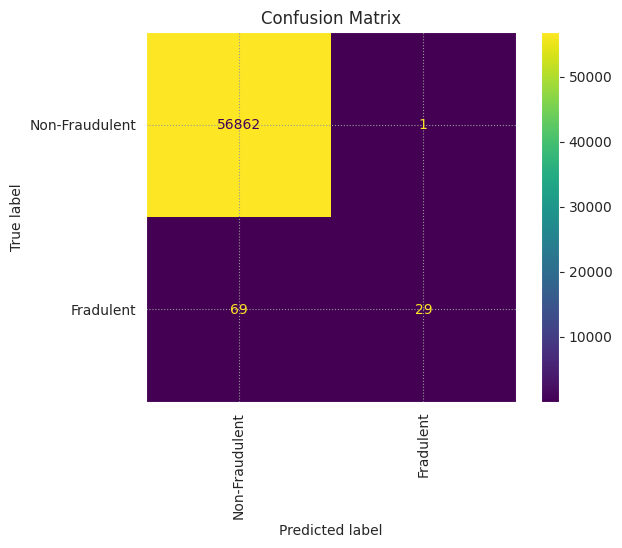

roc_value: 0.9833348108073576
threshold: 0.001581073095925817
ROC for the test dataset 98.3%


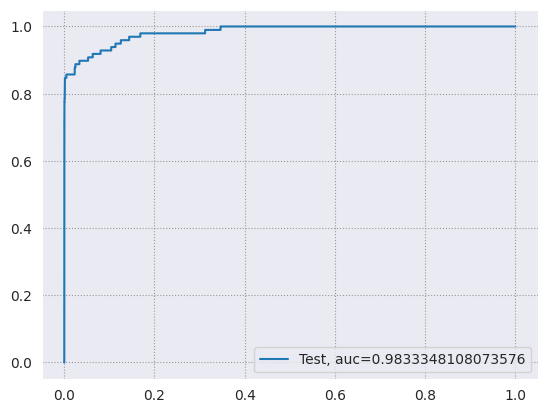

In [46]:
  # X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv
  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

  clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  clf.fit(X_train_SKF_cv,y_train_SKF_cv)

  #find predicted values
  y_pred = clf.predict(X_test_SKF_cv)

  #Find predicted probabilities
  y_pred_probs = clf.predict_proba(X_test_SKF_cv)[:,1]

  # Accuaracy of models
  Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test_SKF_cv)

  print("Accuarcy of Logistic model : {0}".format(Accuracy))

  print_classification_data(y_test_SKF_cv, y_pred)

  roc_value = metrics.roc_auc_score(y_test_SKF_cv, y_pred_probs)
  print("roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test_SKF_cv, y_pred_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 4
2nd Top var = 11
3rd Top var = 2


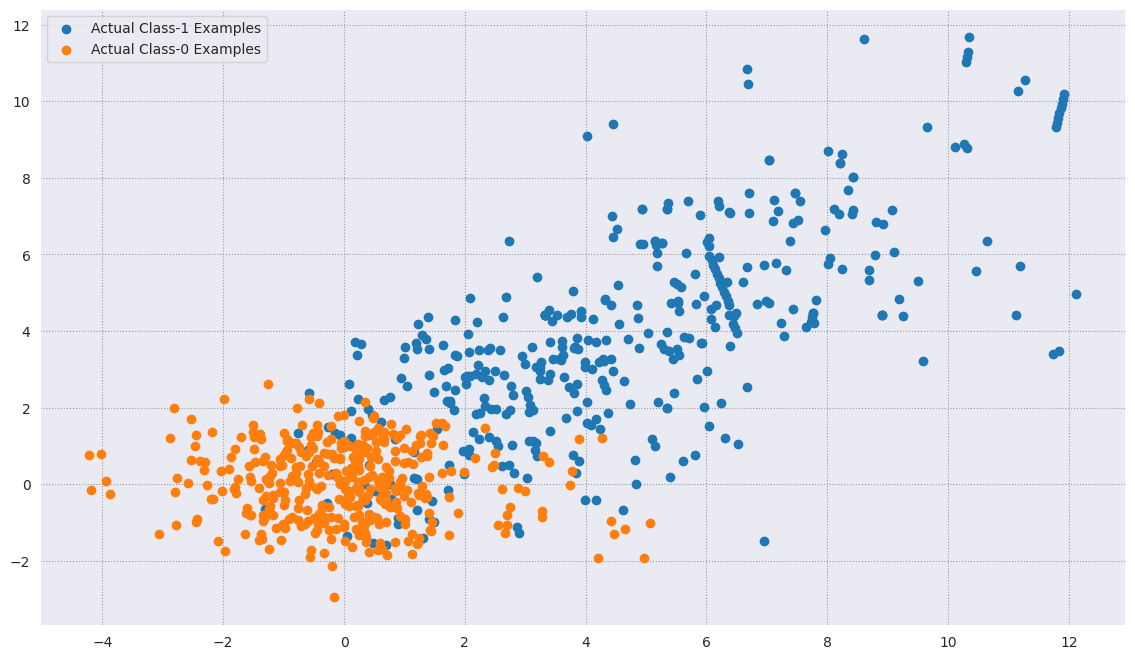

In [47]:
var_imp = []
for i in clf.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.coef_)[-1][-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.coef_)[-1][-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.coef_)[-1][-3])+1)

top_var_index = var_imp.index(np.sort(clf.coef_)[-1][-1])
second_top_var_index = var_imp.index(np.sort(clf.coef_)[-1][-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [48]:
skf = model_selection.StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = over_sampling.RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)


Logistic Regression
Accuarcy of Logistic model : 0.9899755973385299
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961



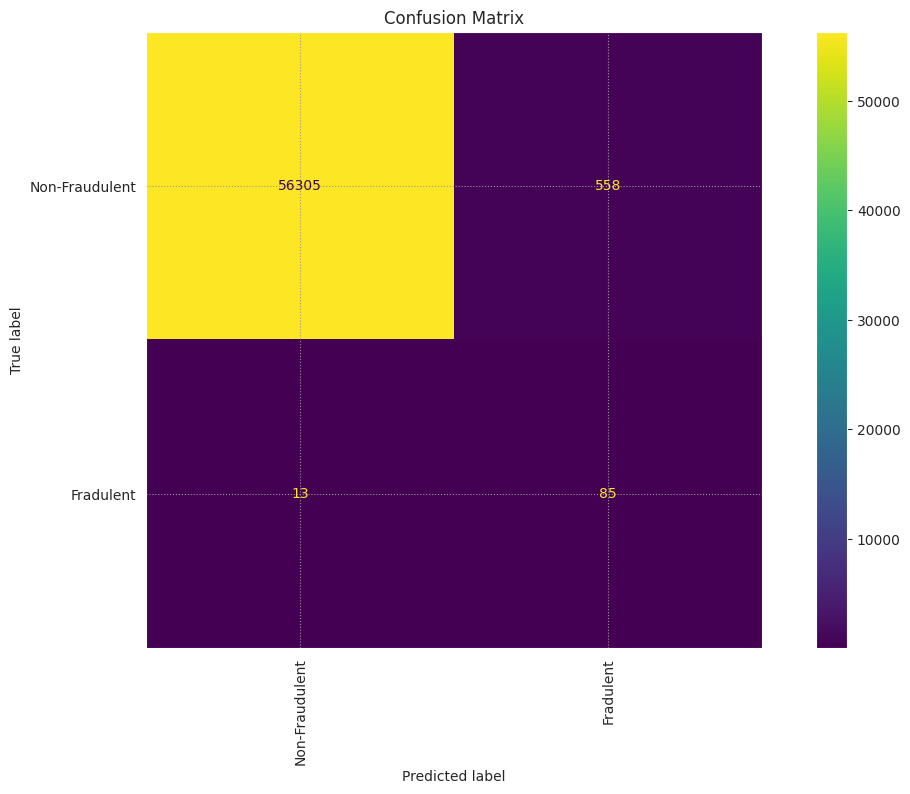

roc_value: 0.9808164054887382
threshold: 0.26792511901298416
ROC for the test dataset 98.1%


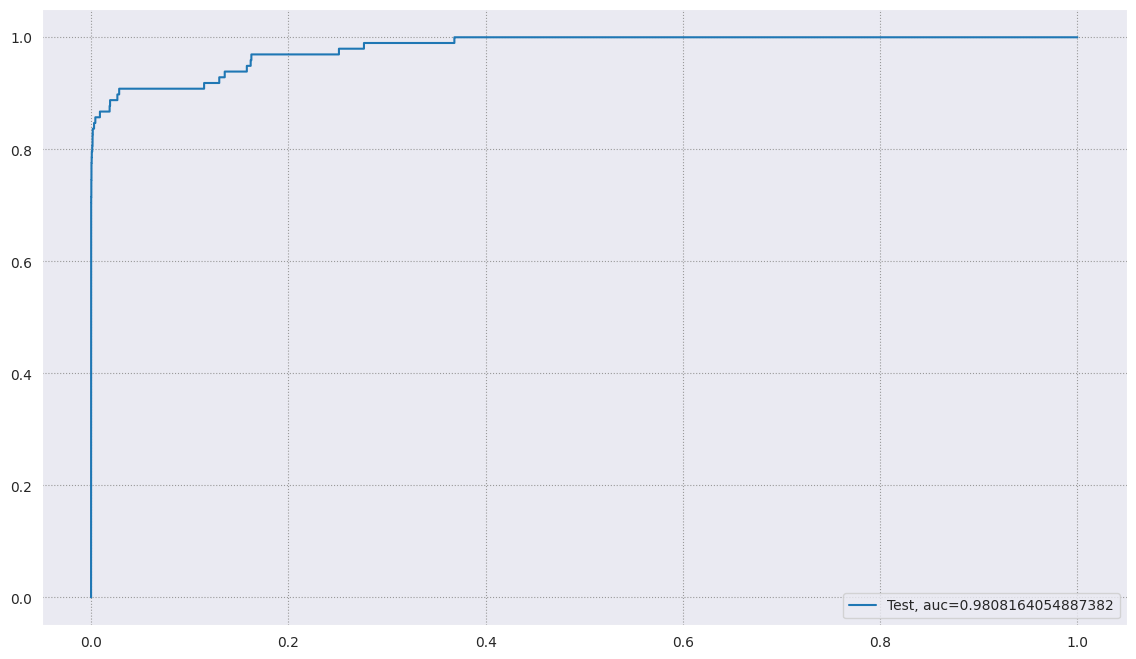

Time Taken by Model: --- 185.4378321170807 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuarcy : 0.9987184213760292
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.60      0.62        98

    accuracy                           1.00     56961
   macro avg       0.82      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961



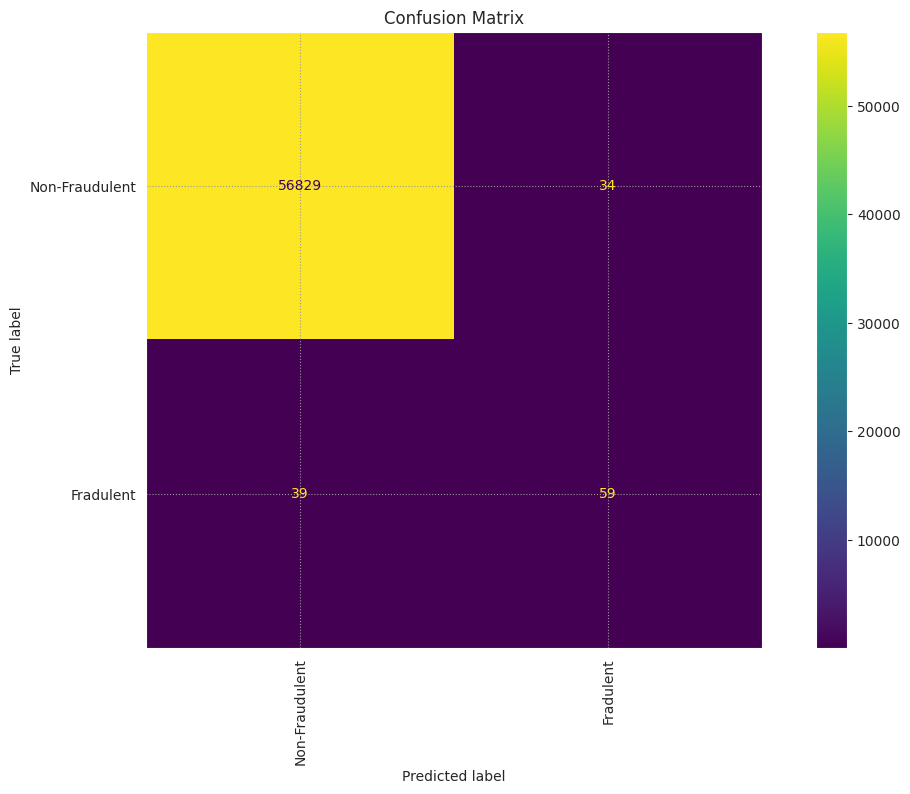

KNN roc_value: 0.8109839366870678
KNN threshold: 0.2
ROC for the test dataset 81.1%


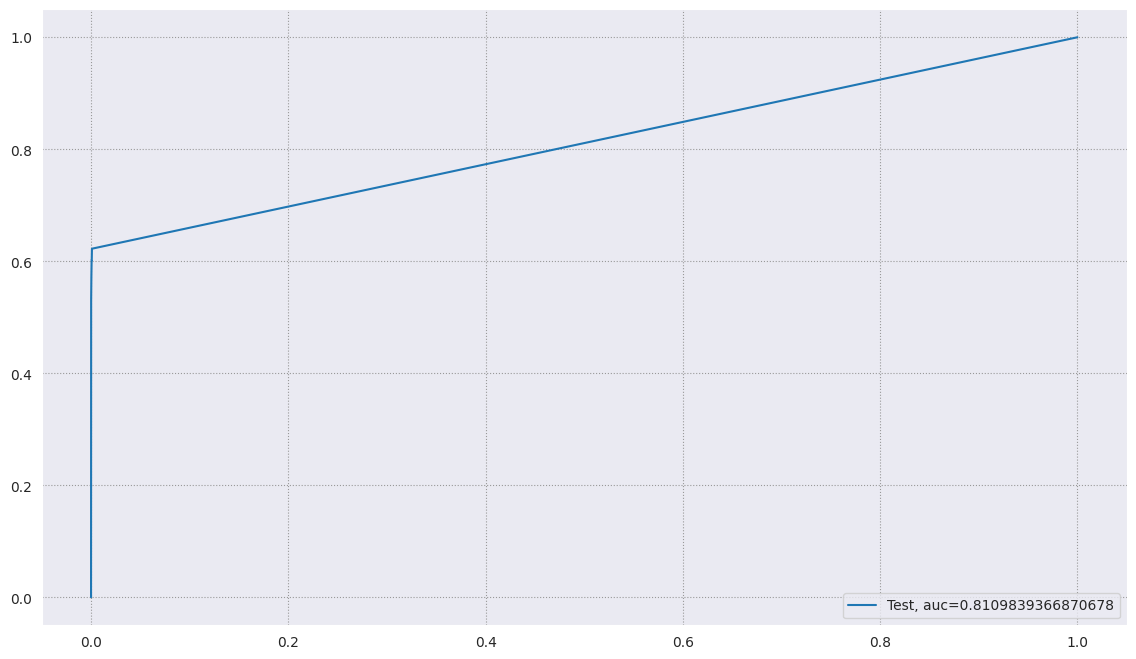

Time Taken by Model: --- 74.21771049499512 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990870946788153
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.63      0.70        98

    accuracy                           1.00     56961
   macro avg       0.90      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961



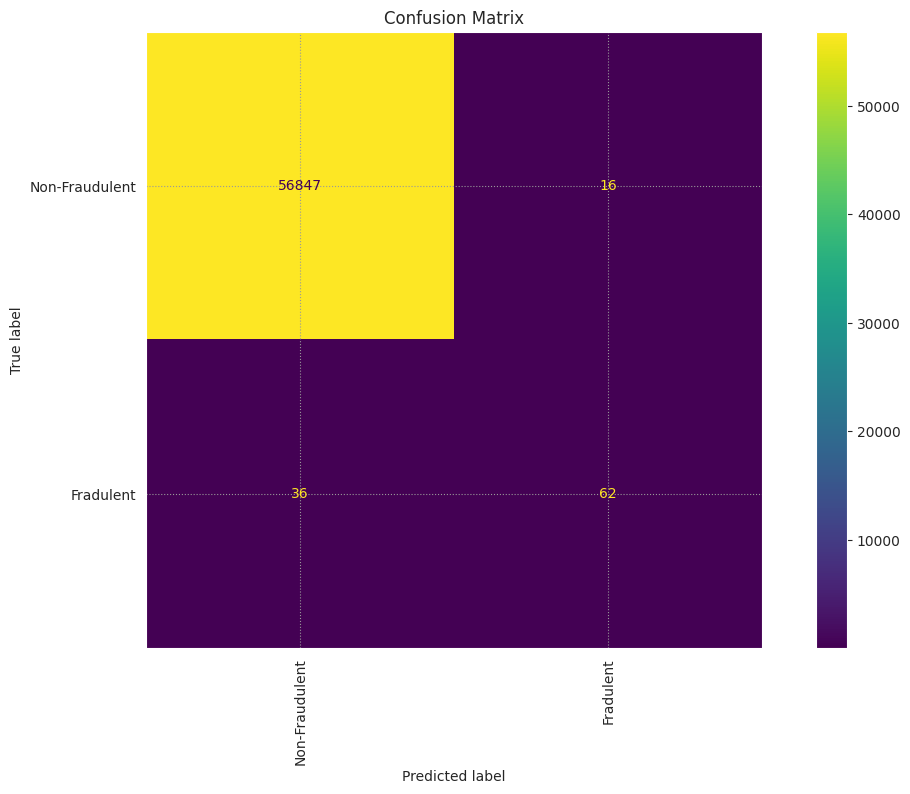

gini tree_roc_value: 0.8161858415877474
Tree threshold: 1.0
ROC for the test dataset 81.6%


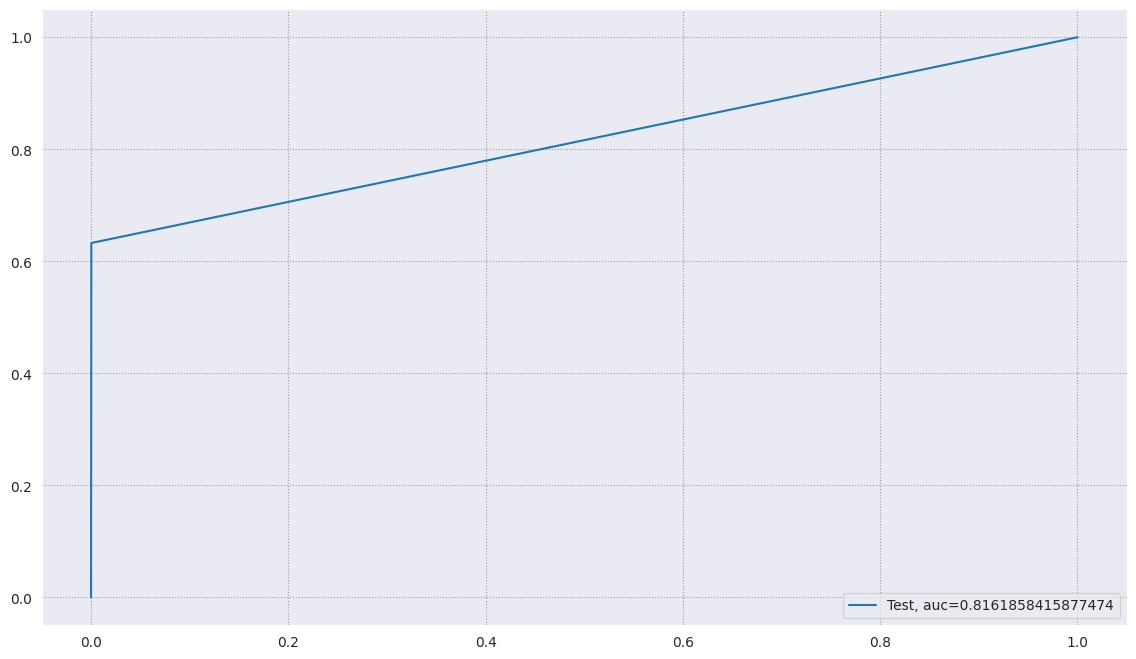

entropy score: 0.9990344270641316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.68      0.71        98

    accuracy                           1.00     56961
   macro avg       0.87      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961



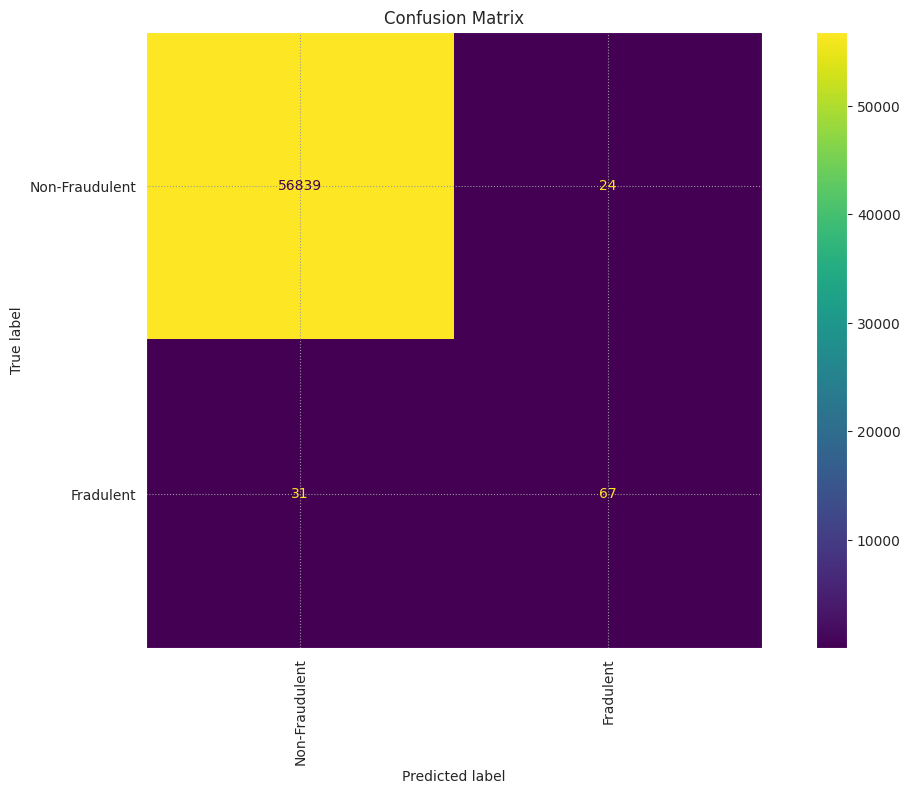

entropy tree_roc_value: 0.8416257011571313
Tree threshold: 1.0
ROC for the test dataset 84.2%


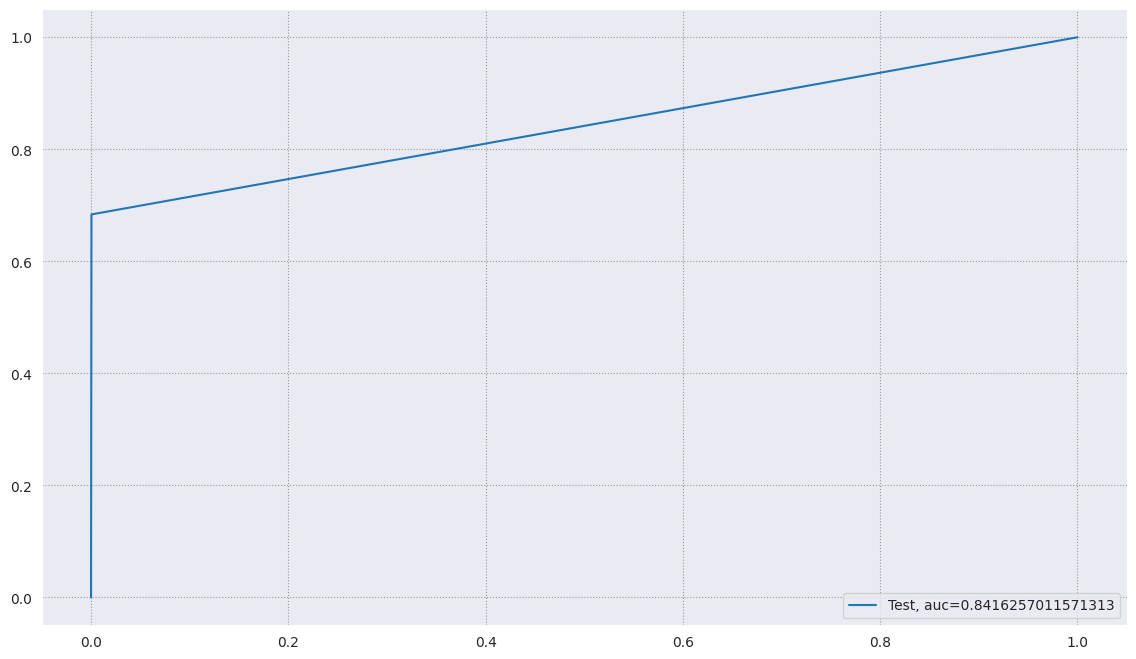

Time Taken by Model: --- 18.70636510848999 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961



Random Forest roc_value: 0.9416364861193409
Random Forest threshold: 0.01
ROC for the test dataset 94.2%


Time Taken by Model: --- 144.6188621520996 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999490879724724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



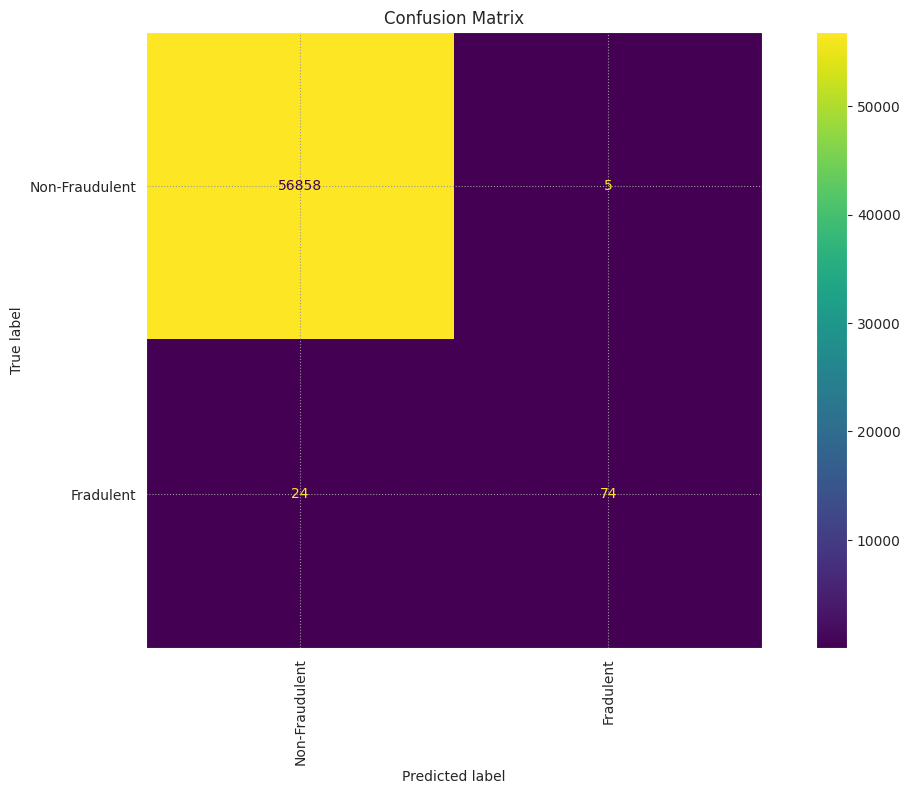

XGboost roc_value: 0.9844784474822587
XGBoost threshold: 2.2975023966864683e-05
ROC for the test dataset 98.4%


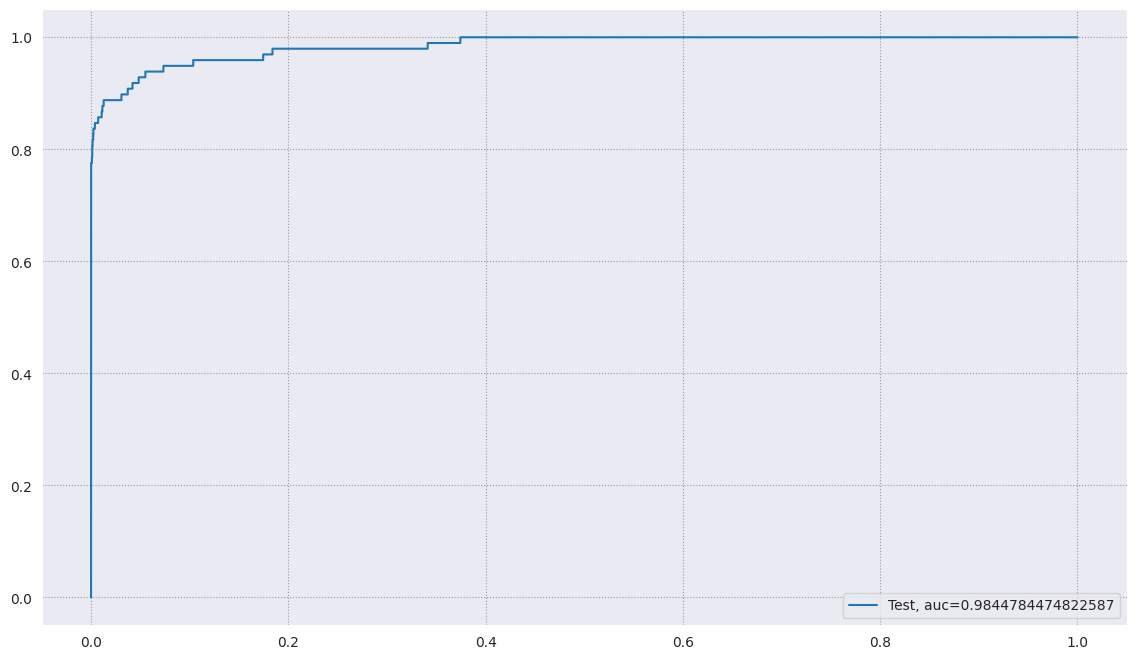

Time Taken by Model: --- 2.1317250728607178 seconds ---
--------------------------------------------------------------------------------


In [49]:
Data_Imbalance_Handiling = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression
print("Logistic Regression")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [51]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7               StratifiedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    

                               Model  Accuracy  roc_value  threshold  
0                Logistic Regression  0.998964   0.966307   0.001029  
1                                KNN  0.999350   0.900851   0.200000  
2                                SVM  0.998578   0.887620   0.001215  
3      Tree Model with gini criteria  0.998999   0.874710   1.000000  
4   Tree Model with entropy criteria  0.999105   0.864364   1.000000  
5                      Random Forest  0.999350   0.925014   0.010000  
6                            XGBoost  0.999421   0.972360   0.000036  
7                Logistic Regression  0.998771   0.983335   0.001581  
8                                KNN  0.999122   0.811005   0.200000  
9                                SVM  0.998280   0.402146   0.001745  
10     Tree Model with gini criteria  0.998964   0.841591   1.000000  
11  Tree Model with entropy criteria  0.999087   0.821279   1.000000  
12                     Random Forest  0.999456   0.926516   0.010000  
13                           XGBoost  0.999473   0.981288   0.000066  
14               Logistic Regression  0.989976   0.980816   0.267925  
15                               KNN  0.998718   0.810984   0.200000  
16     Tree Model with gini criteria  0.999087   0.816186   1.000000  
17  Tree Model with entropy criteria  0.999034   0.841626   1.000000  
18                     Random Forest  0.999491   0.941636   0.010000  
19                           XGBoost  0.999491   0.984478   0.000023

### SMOTE

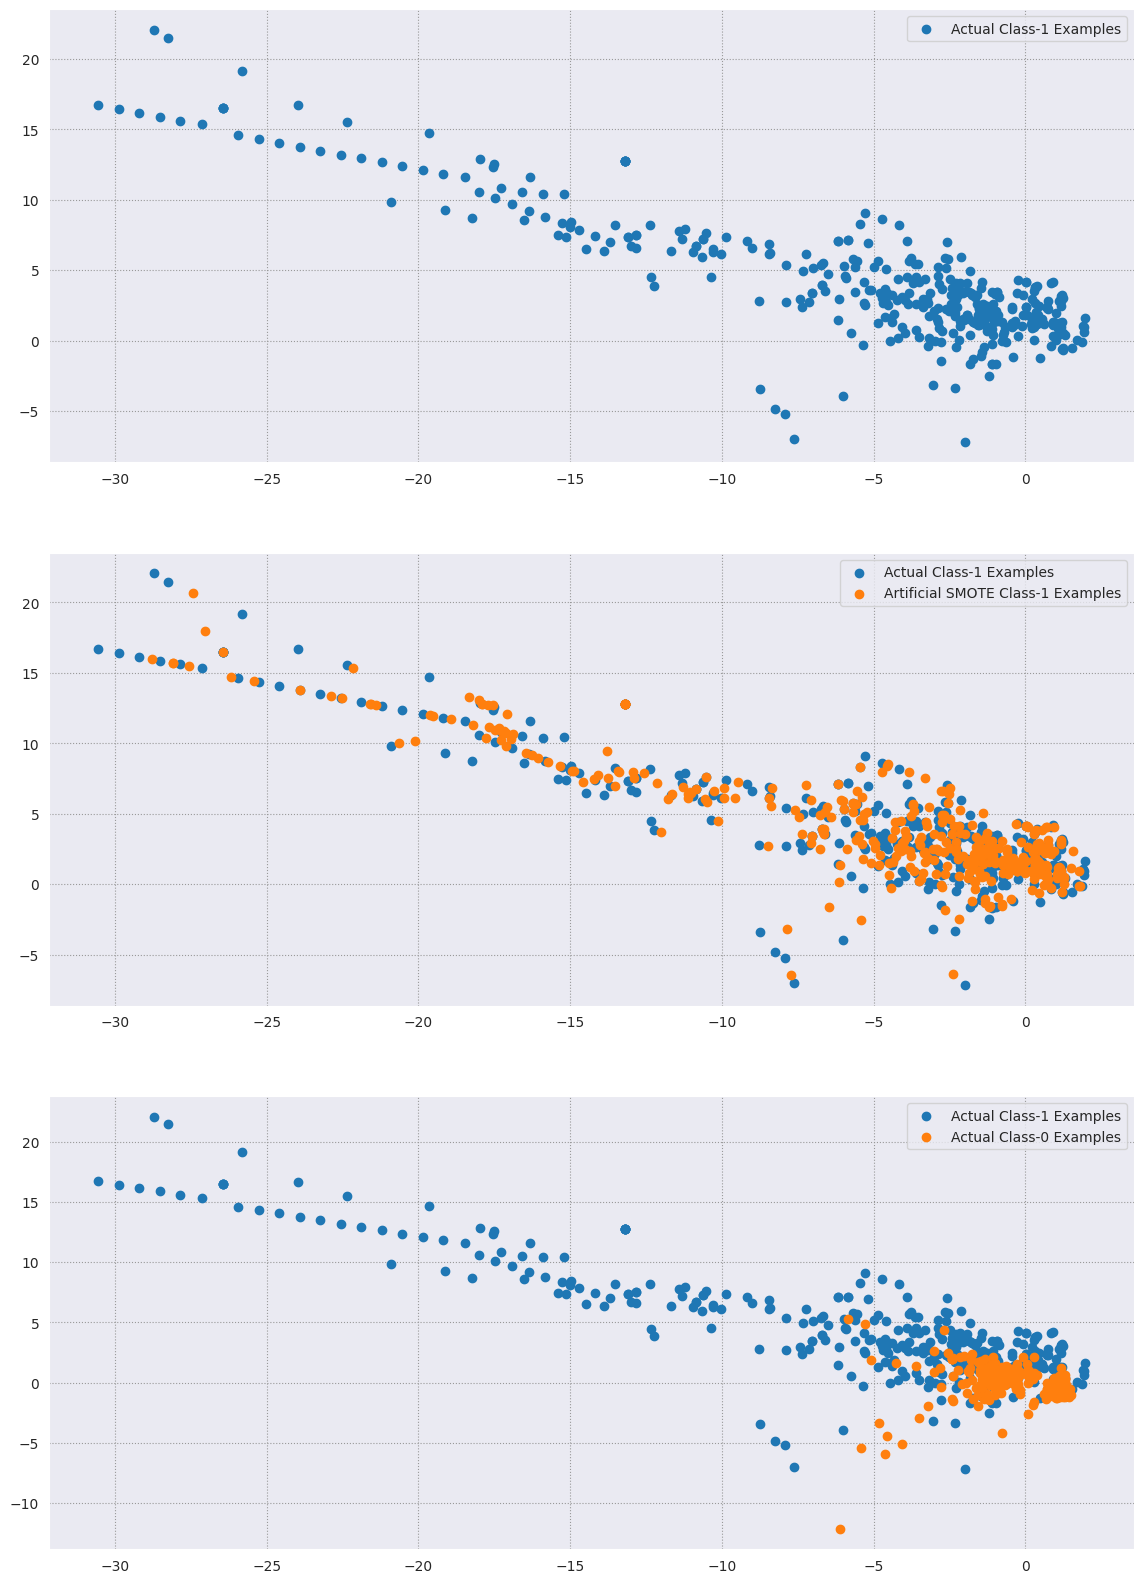

In [52]:
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [14, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# Use .iloc to slice the DataFrame correctly
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [53]:
plt.rcParams['figure.figsize'] = [8, 8]

Logistic Regression
Accuarcy of Logistic model : 0.9839012657783396
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961



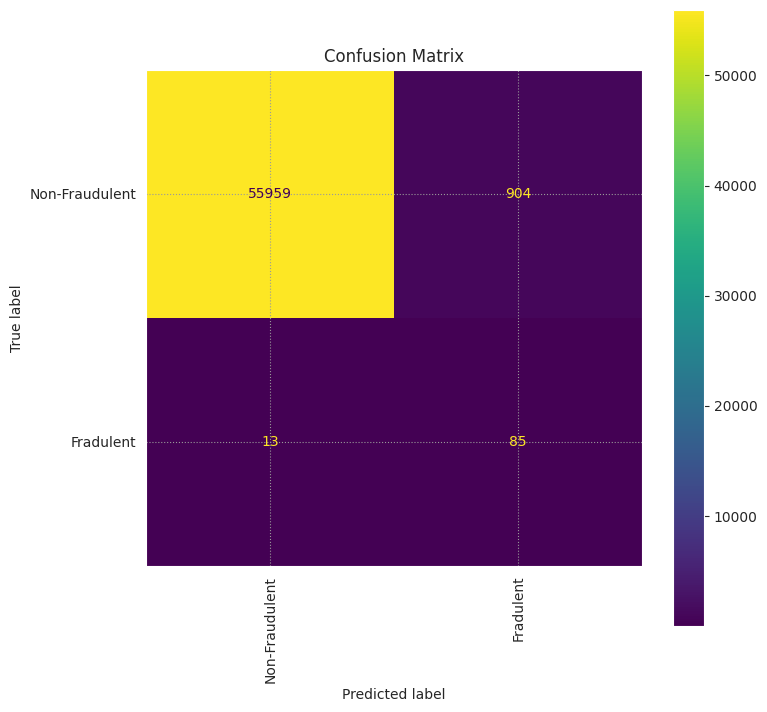

roc_value: 0.9755983500622872
threshold: 0.3813886281439579
ROC for the test dataset 97.6%


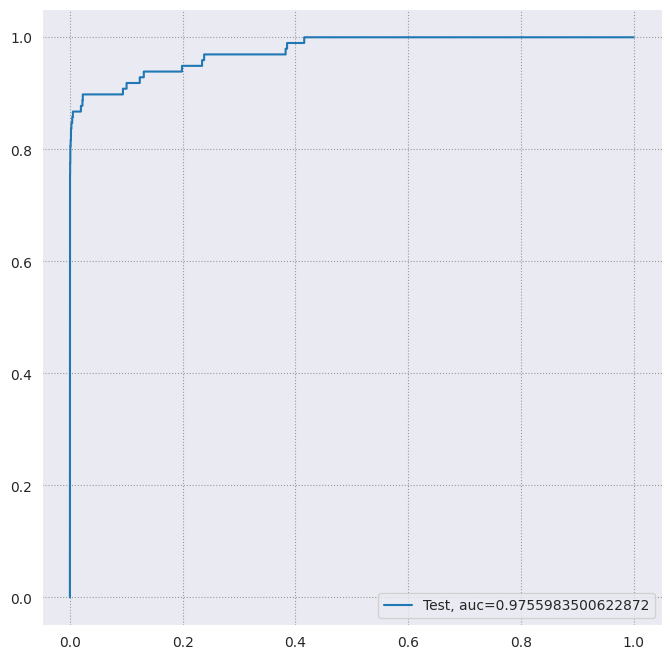

Time Taken by Model: --- 264.80037689208984 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuarcy : 0.9962079317427713
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961



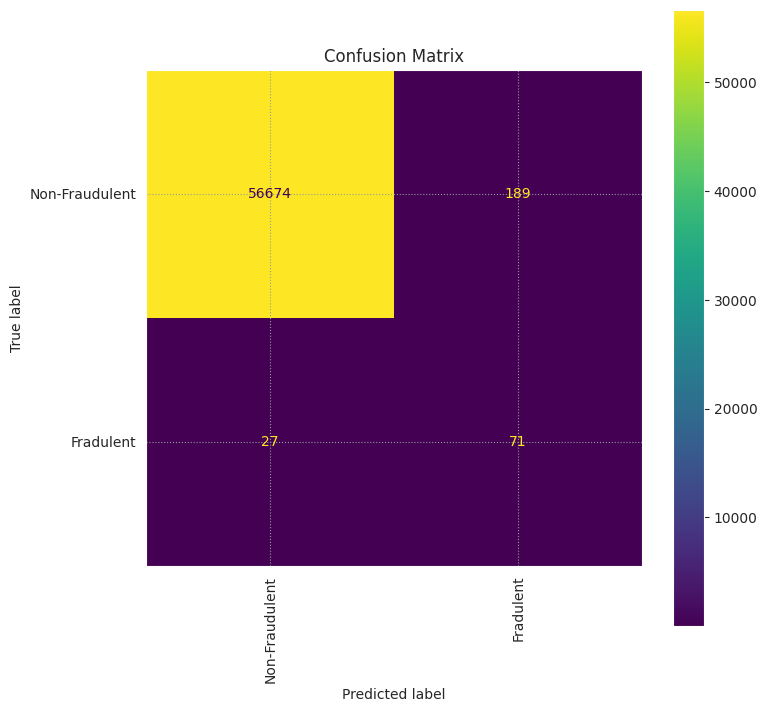

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


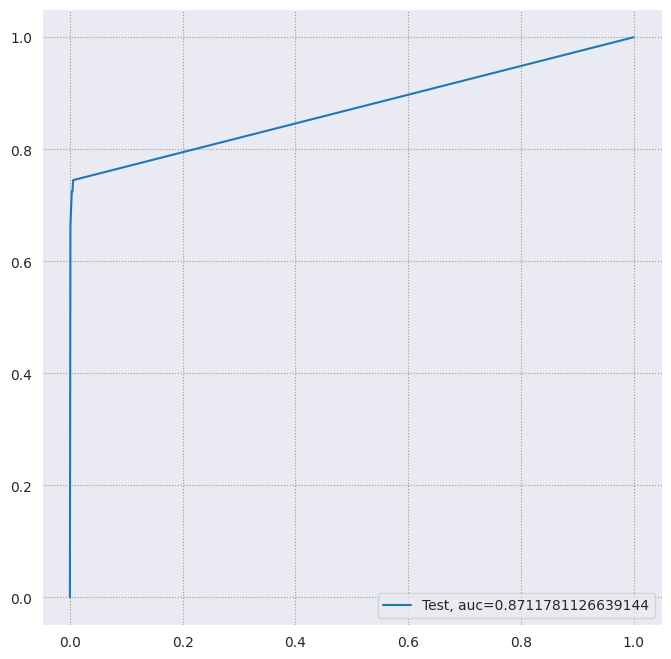

Time Taken by Model: --- 96.73273468017578 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980512982567019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.68      0.55        98

    accuracy                           1.00     56961
   macro avg       0.73      0.84      0.77     56961
weighted avg       1.00      1.00      1.00     56961



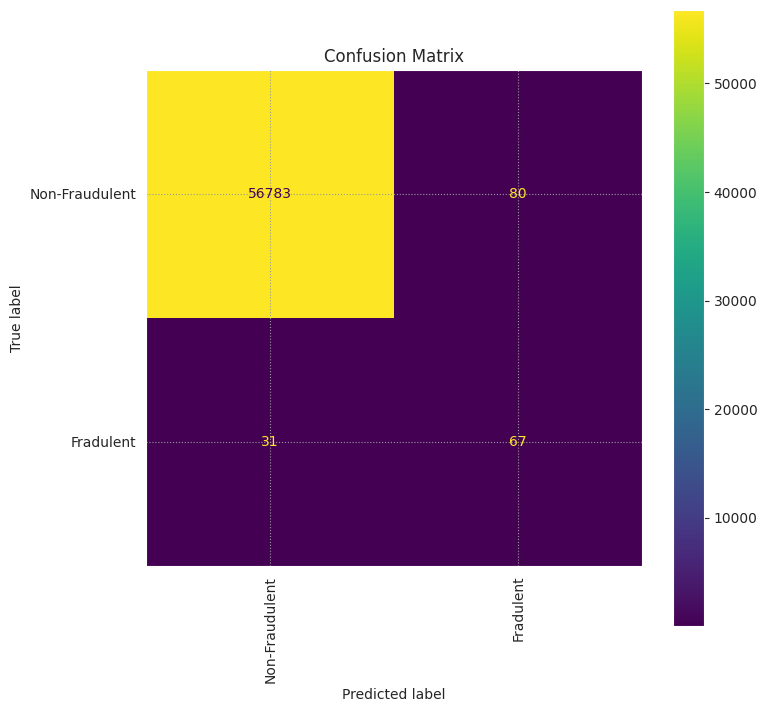

gini tree_roc_value: 0.8411332895713902
Tree threshold: 1.0
ROC for the test dataset 84.1%


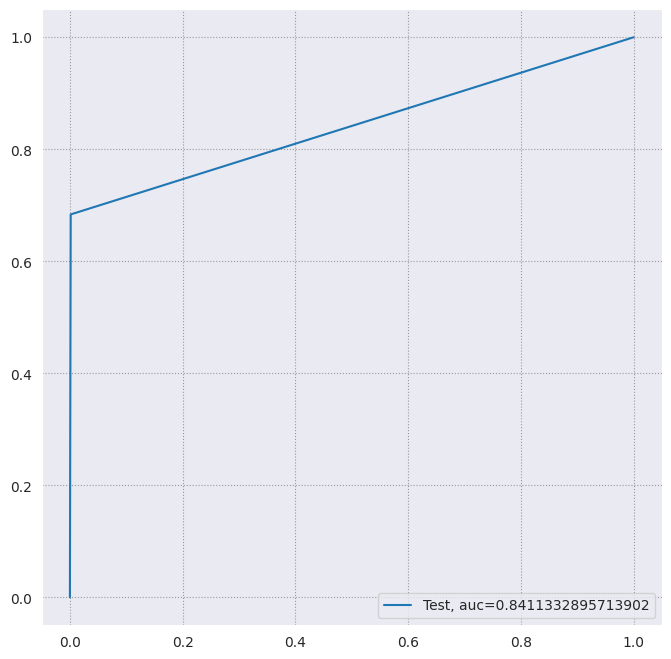

entropy score: 0.9983146363301206
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.51      0.73      0.60        98

    accuracy                           1.00     56961
   macro avg       0.75      0.87      0.80     56961
weighted avg       1.00      1.00      1.00     56961



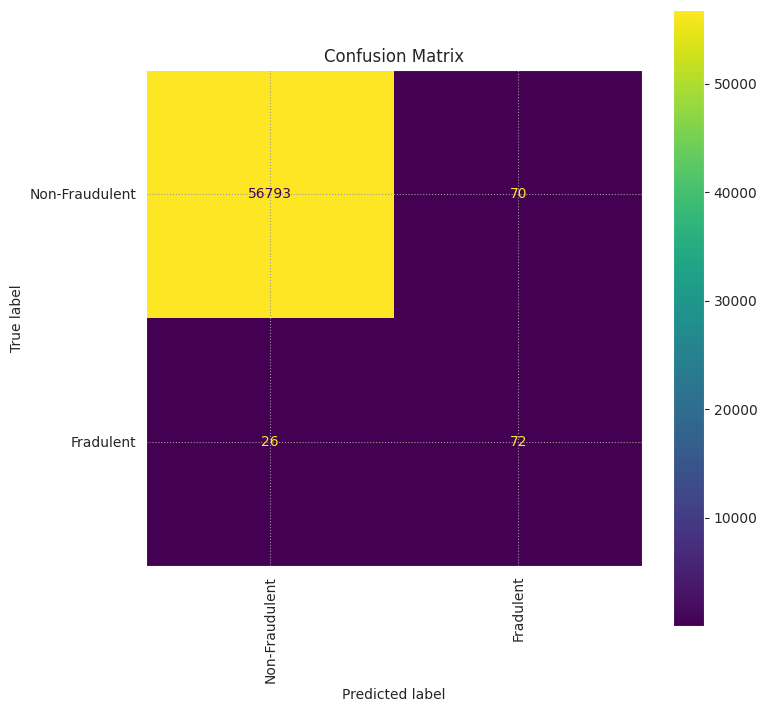

entropy tree_roc_value: 0.8667314242933337
Tree threshold: 1.0
ROC for the test dataset 86.7%


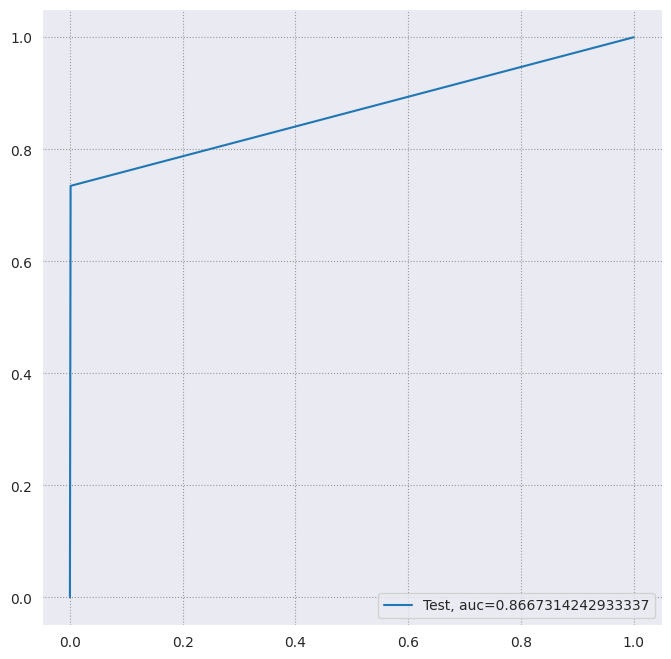

Time Taken by Model: --- 60.87356376647949 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611032109689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961



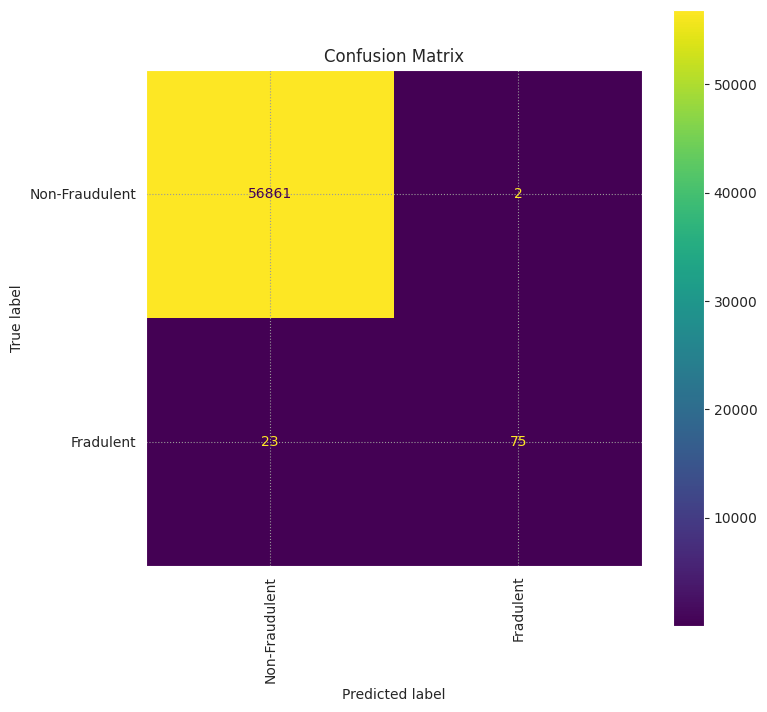

Random Forest roc_value: 0.9474941023663391
Random Forest threshold: 0.03
ROC for the test dataset 94.7%


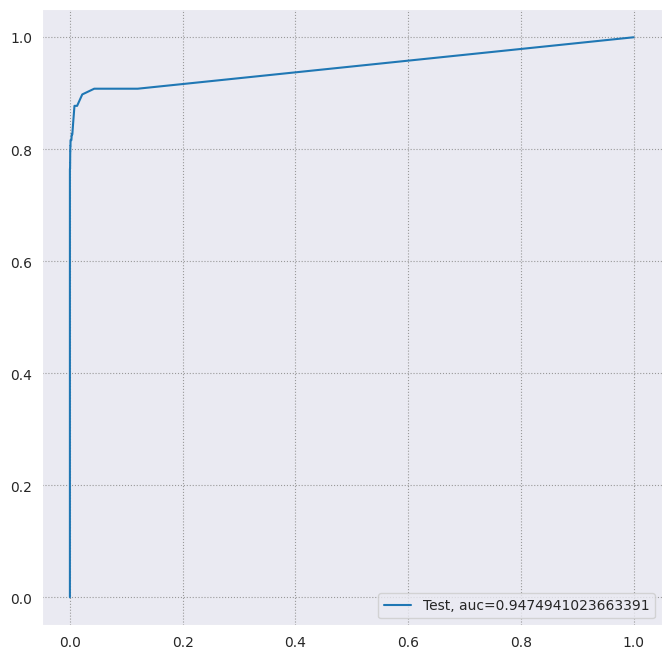

Time Taken by Model: --- 331.62738156318665 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993328768806727
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.77      0.80        98

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961



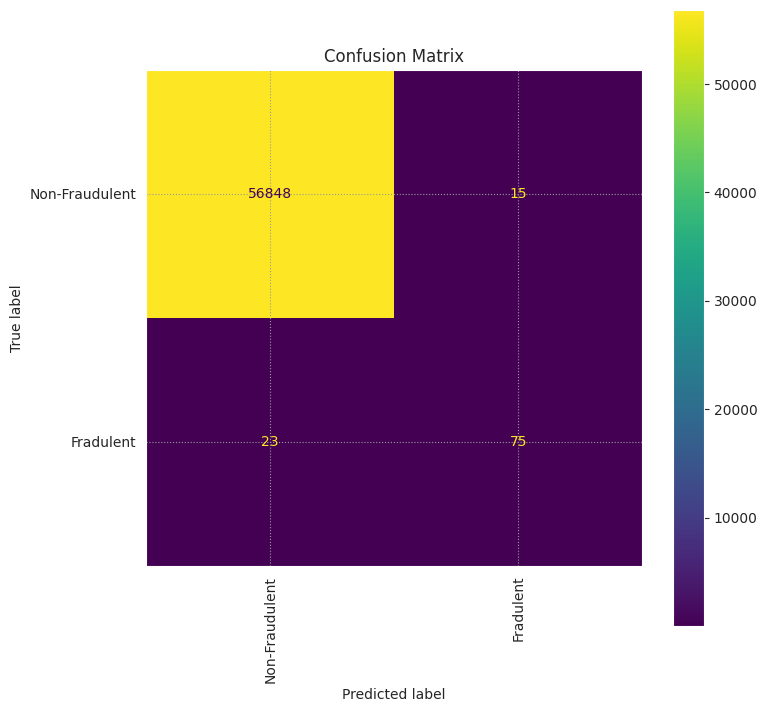

XGboost roc_value: 0.9720740361635394
XGBoost threshold: 0.0001649029436521232
ROC for the test dataset 97.2%


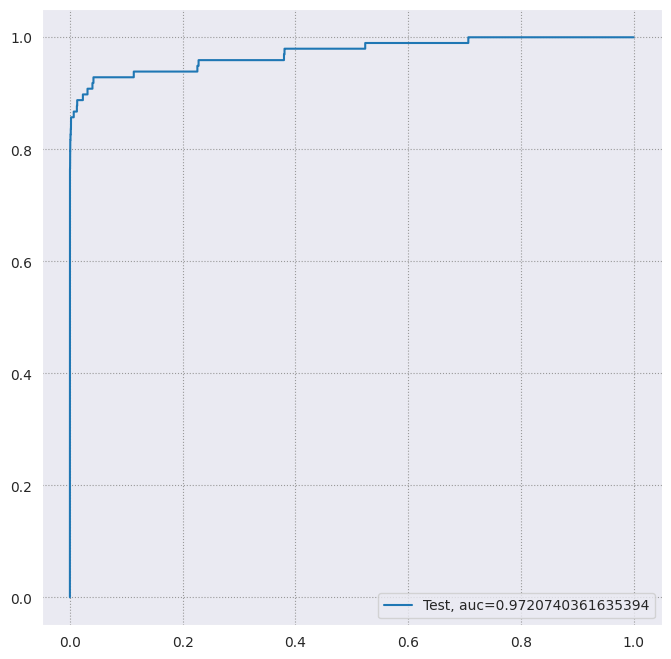

Time Taken by Model: --- 4.337944984436035 seconds ---
--------------------------------------------------------------------------------


In [54]:
Data_Imbalance_Handiling = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression
print("Logistic Regression")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [55]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7               StratifiedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20   SMOTE Oversampling with StratifiedKFold CV    
21   SMOTE Oversampling with StratifiedKFold CV    
22   SMOTE Oversampling with StratifiedKFold CV    
23   SMOTE Oversampling with StratifiedKFold CV    
24   SMOTE Oversampling with StratifiedKFold CV    
25   SMOTE Oversampling with StratifiedKFold CV    

                               Model  Accuracy  roc_value  threshold  
0                Logistic Regression  0.998964   0.966307   0.001029  
1                                KNN  0.999350   0.900851   0.200000  
2                                SVM  0.998578   0.887620   0.001215  
3      Tree Model with gini criteria  0.998999   0.874710   1.000000  
4   Tree Model with entropy criteria  0.999105   0.864364   1.000000  
5                      Random Forest  0.999350   0.925014   0.010000  
6                            XGBoost  0.999421   0.972360   0.000036  
7                Logistic Regression  0.998771   0.983335   0.001581  
8                                KNN  0.999122   0.811005   0.200000  
9                                SVM  0.998280   0.402146   0.001745  
10     Tree Model with gini criteria  0.998964   0.841591   1.000000  
11  Tree Model with entropy criteria  0.999087   0.821279   1.000000  
12                     Random Forest  0.999456   0.926516   0.010000  
13                           XGBoost  0.999473   0.981288   0.000066  
14               Logistic Regression  0.989976   0.980816   0.267925  
15                               KNN  0.998718   0.810984   0.200000  
16     Tree Model with gini criteria  0.999087   0.816186   1.000000  
17  Tree Model with entropy criteria  0.999034   0.841626   1.000000  
18                     Random Forest  0.999491   0.941636   0.010000  
19                           XGBoost  0.999491   0.984478   0.000023  
20               Logistic Regression  0.983901   0.975598   0.381389  
21                               KNN  0.996208   0.871178   0.200000  
22     Tree Model with gini criteria  0.998051   0.841133   1.000000  
23  Tree Model with entropy criteria  0.998315   0.866731   1.000000  
24                     Random Forest  0.999561   0.947494   0.030000  
25                           XGBoost  0.999333   0.972074   0.000165

### ADASYN

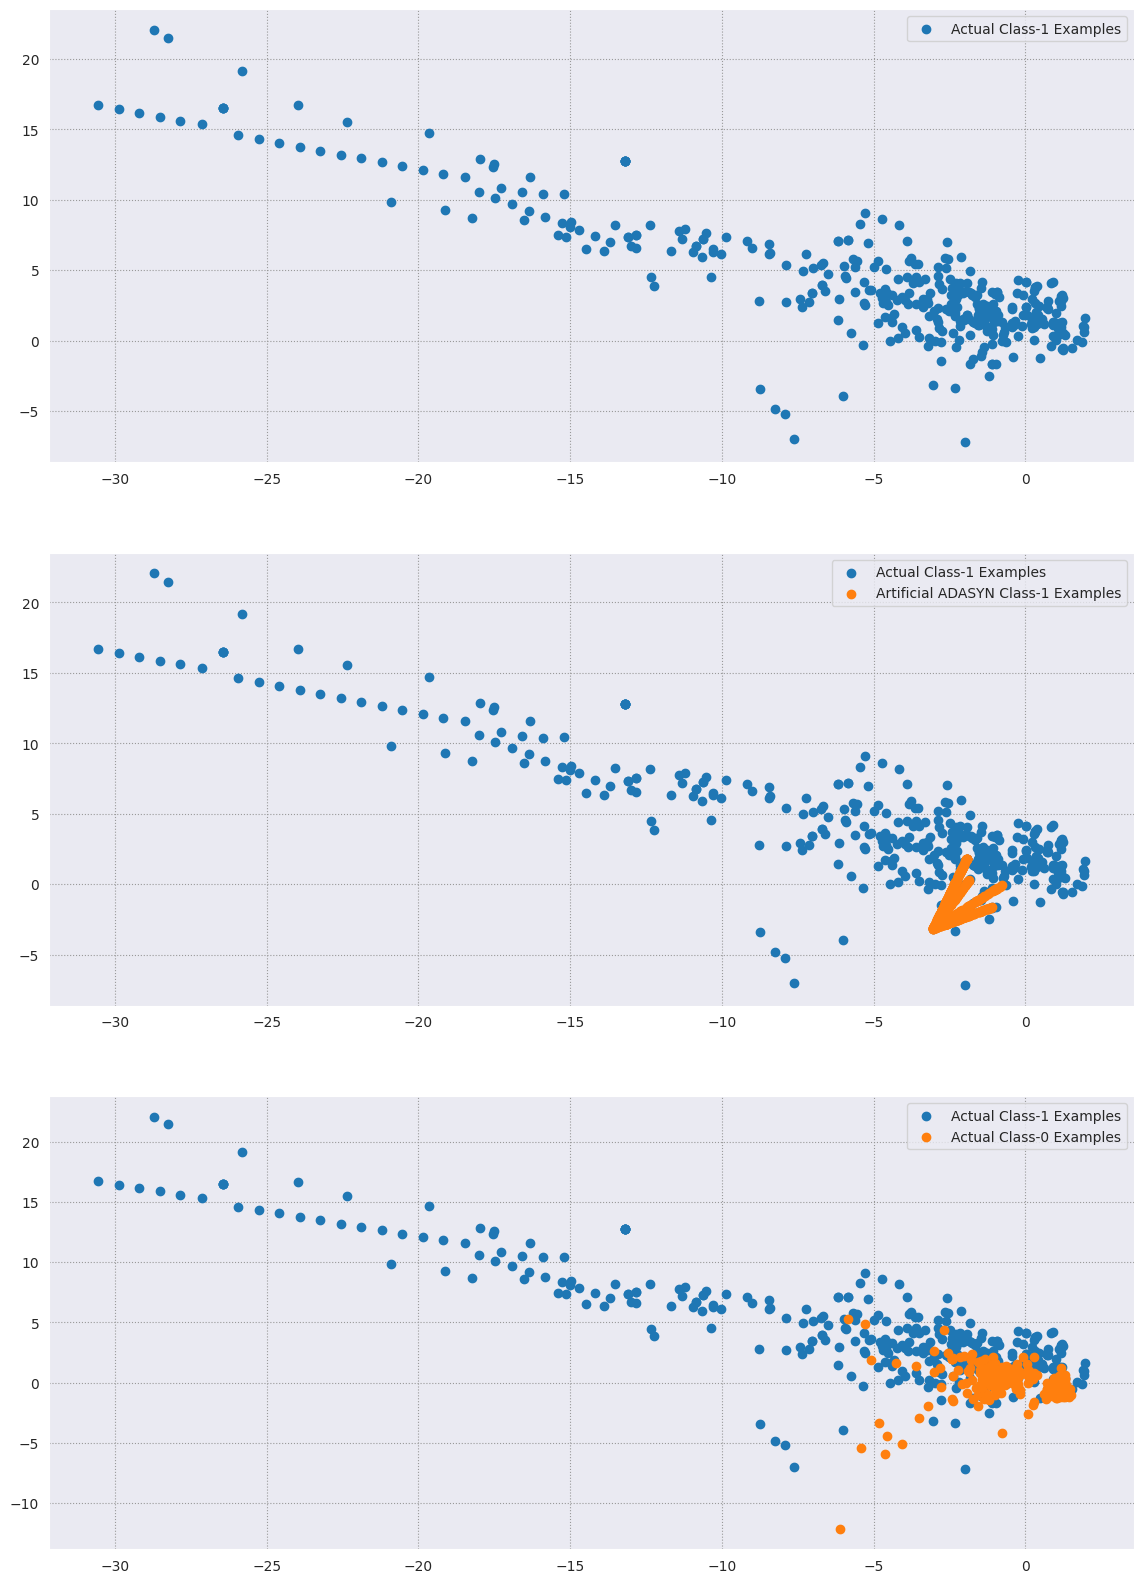

In [56]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [14, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [57]:
plt.rcParams['figure.figsize'] = [8, 8]

Logistic Regression
Accuarcy of Logistic model : 0.9601130598128544
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961



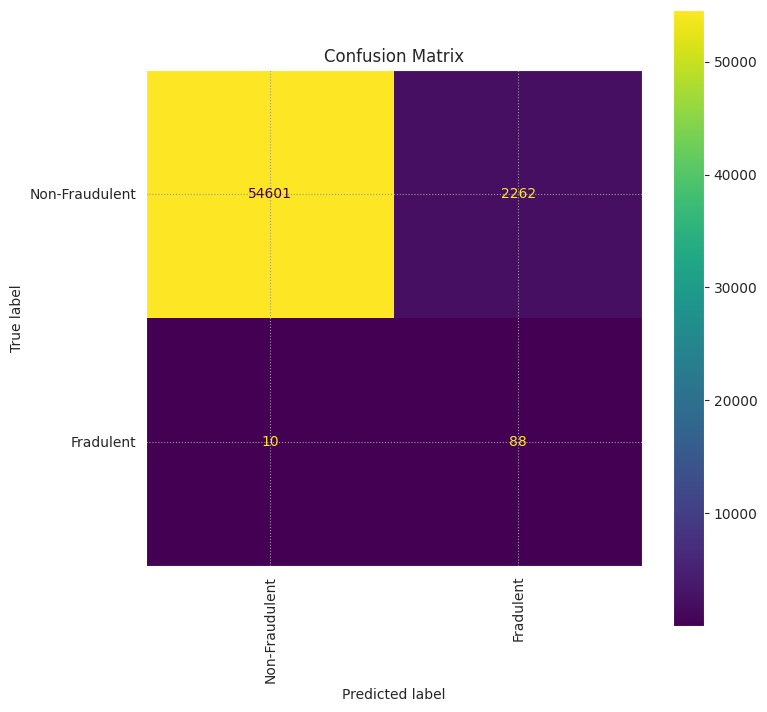

roc_value: 0.975352323719703
threshold: 0.6325430437868719
ROC for the test dataset 97.5%


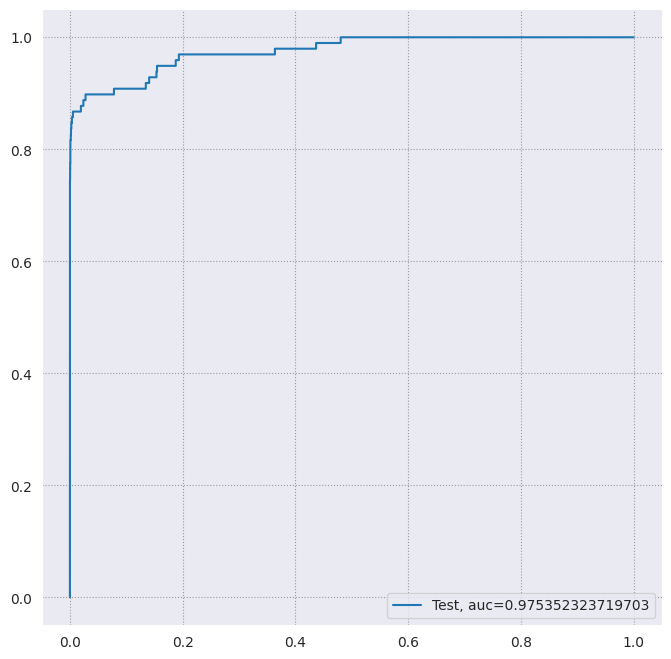

Time Taken by Model: --- 286.3294982910156 seconds ---
--------------------------------------------------------------------------------
KNN Model
KNN Accuarcy : 0.9958392584399852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961



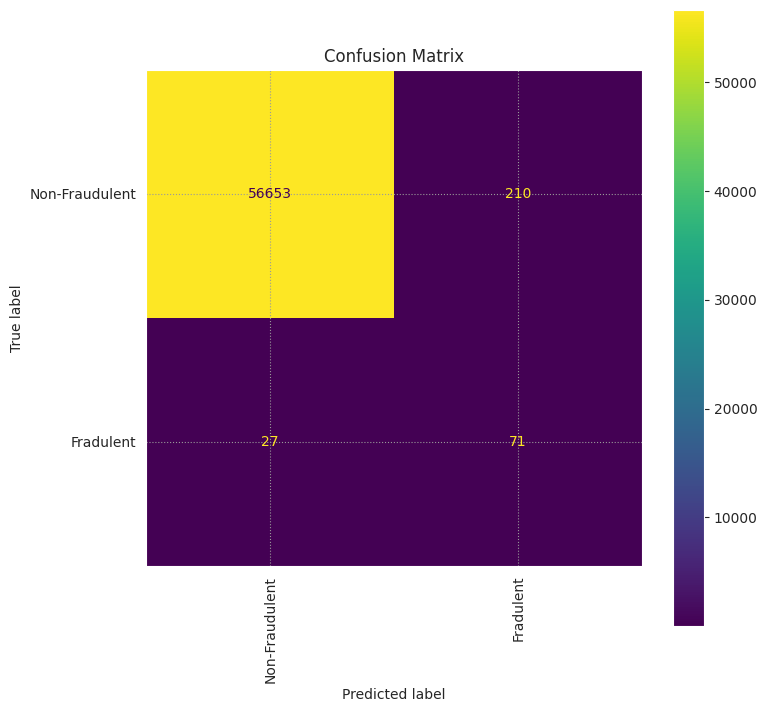

KNN roc_value: 0.8711282254843093
KNN threshold: 0.2
ROC for the test dataset 87.1%


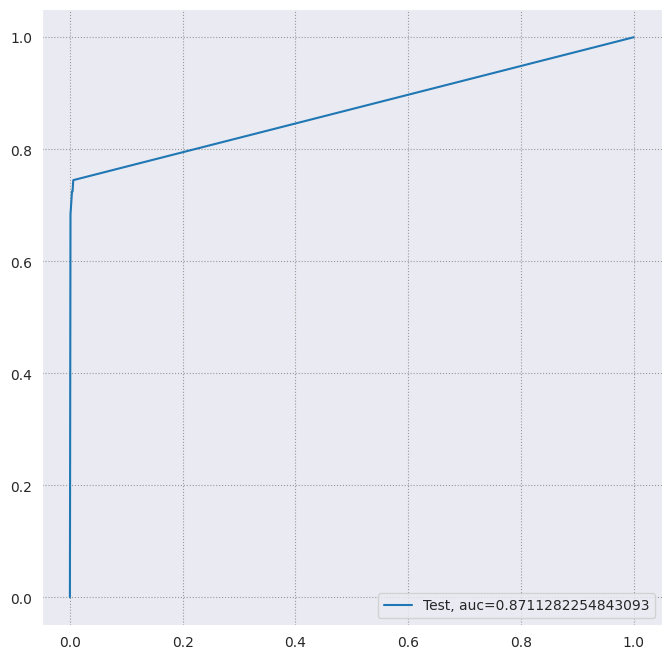

Time Taken by Model: --- 98.1640887260437 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979284071557732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961



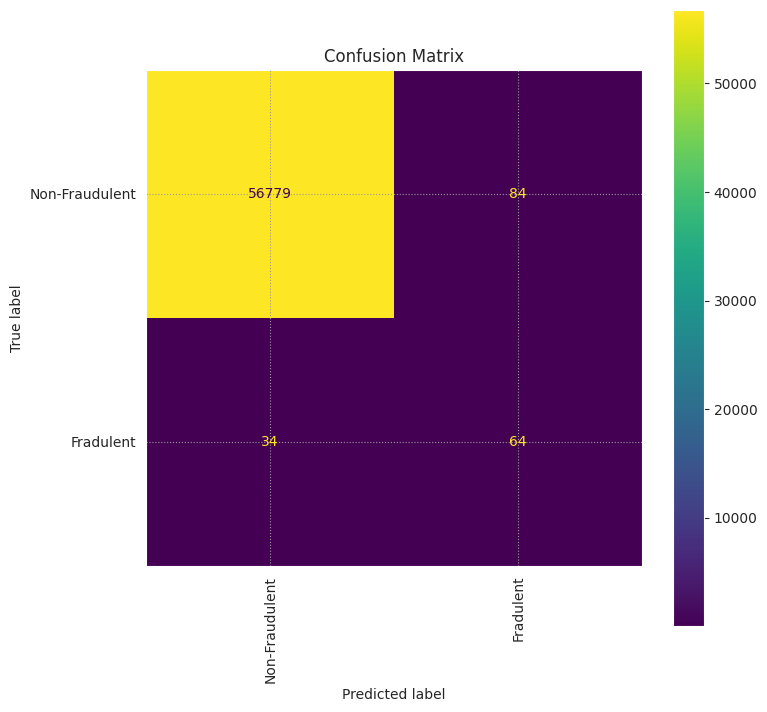

gini tree_roc_value: 0.8257919948662862
Tree threshold: 1.0
ROC for the test dataset 82.6%


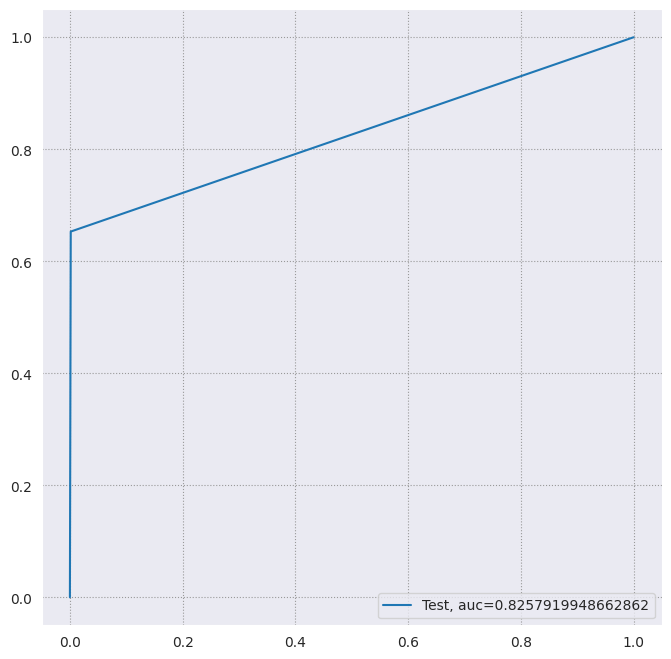

entropy score: 0.9984375274310493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.53      0.74      0.62        98

    accuracy                           1.00     56961
   macro avg       0.77      0.87      0.81     56961
weighted avg       1.00      1.00      1.00     56961



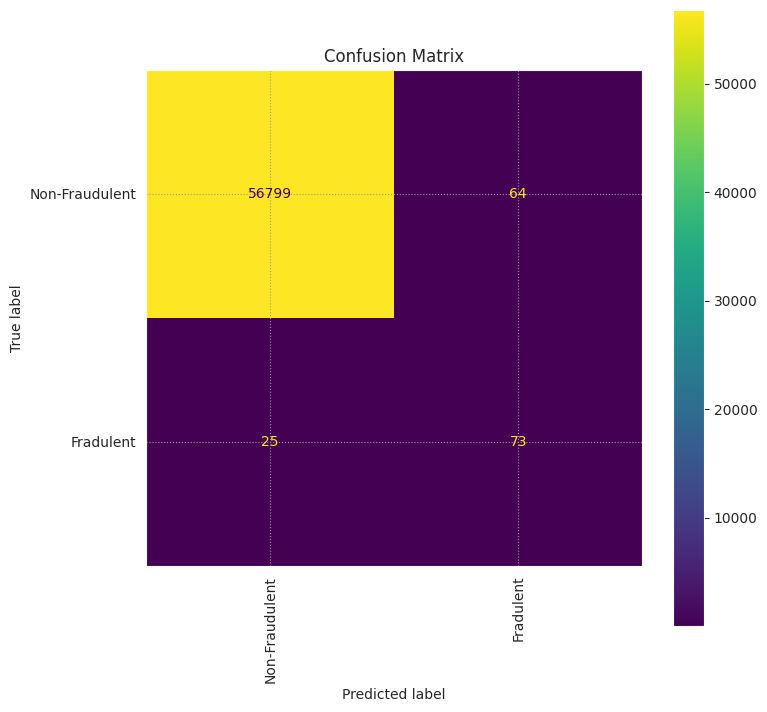

entropy tree_roc_value: 0.8718862234938468
Tree threshold: 1.0
ROC for the test dataset 87.2%


Time Taken by Model: --- 61.967307329177856 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



Random Forest roc_value: 0.9424467041622059
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


Time Taken by Model: --- 342.48261404037476 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.79      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961



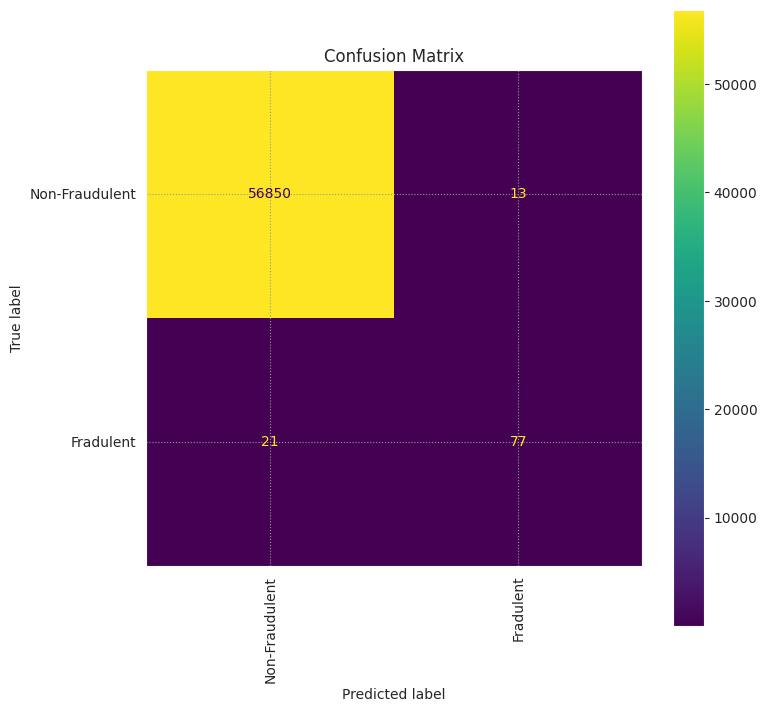

XGboost roc_value: 0.9755572559467132
XGBoost threshold: 0.00016162160318344831
ROC for the test dataset 97.6%


Time Taken by Model: --- 3.1558008193969727 seconds ---
--------------------------------------------------------------------------------


In [58]:
Data_Imbalance_Handiling = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression
print("Logistic Regression")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [59]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7               StratifiedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20   SMOTE Oversampling with StratifiedKFold CV    
21   SMOTE Oversampling with StratifiedKFold CV    
22   SMOTE Oversampling with StratifiedKFold CV    
23   SMOTE Oversampling with StratifiedKFold CV    
24   SMOTE Oversampling with StratifiedKFold CV    
25   SMOTE Oversampling with StratifiedKFold CV    
26  ADASYN Oversampling with StratifiedKFold CV    
27  ADASYN Oversampling with StratifiedKFold CV    
28  ADASYN Oversampling with StratifiedKFold CV    
29  ADASYN Oversampling with StratifiedKFold CV    
30  ADASYN Oversampling with StratifiedKFold CV    
31  ADASYN Oversampling with StratifiedKFold CV    

                               Model  Accuracy  roc_value  threshold  
0                Logistic Regression  0.998964   0.966307   0.001029  
1                                KNN  0.999350   0.900851   0.200000  
2                                SVM  0.998578   0.887620   0.001215  
3      Tree Model with gini criteria  0.998999   0.874710   1.000000  
4   Tree Model with entropy criteria  0.999105   0.864364   1.000000  
5                      Random Forest  0.999350   0.925014   0.010000  
6                            XGBoost  0.999421   0.972360   0.000036  
7                Logistic Regression  0.998771   0.983335   0.001581  
8                                KNN  0.999122   0.811005   0.200000  
9                                SVM  0.998280   0.402146   0.001745  
10     Tree Model with gini criteria  0.998964   0.841591   1.000000  
11  Tree Model with entropy criteria  0.999087   0.821279   1.000000  
12                     Random Forest  0.999456   0.926516   0.010000  
13                           XGBoost  0.999473   0.981288   0.000066  
14               Logistic Regression  0.989976   0.980816   0.267925  
15                               KNN  0.998718   0.810984   0.200000  
16     Tree Model with gini criteria  0.999087   0.816186   1.000000  
17  Tree Model with entropy criteria  0.999034   0.841626   1.000000  
18                     Random Forest  0.999491   0.941636   0.010000  
19                           XGBoost  0.999491   0.984478   0.000023  
20               Logistic Regression  0.983901   0.975598   0.381389  
21                               KNN  0.996208   0.871178   0.200000  
22     Tree Model with gini criteria  0.998051   0.841133   1.000000  
23  Tree Model with entropy criteria  0.998315   0.866731   1.000000  
24                     Random Forest  0.999561   0.947494   0.030000  
25                           XGBoost  0.999333   0.972074   0.000165  
26               Logistic Regression  0.960113   0.975352   0.632543  
27                               KNN  0.995839   0.871128   0.200000  
28     Tree Model with gini criteria  0.997928   0.825792   1.000000  
29  Tree Model with entropy criteria  0.998438   0.871886   1.000000  
30                     Random Forest  0.999491   0.942447   0.030000  
31                           XGBoos

### Insight: Random Oversampling with StratifiedKFold CV, XGBoost model has the maximum roc value of 0.984478

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

Model Accuracy: 0.999490879724724
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



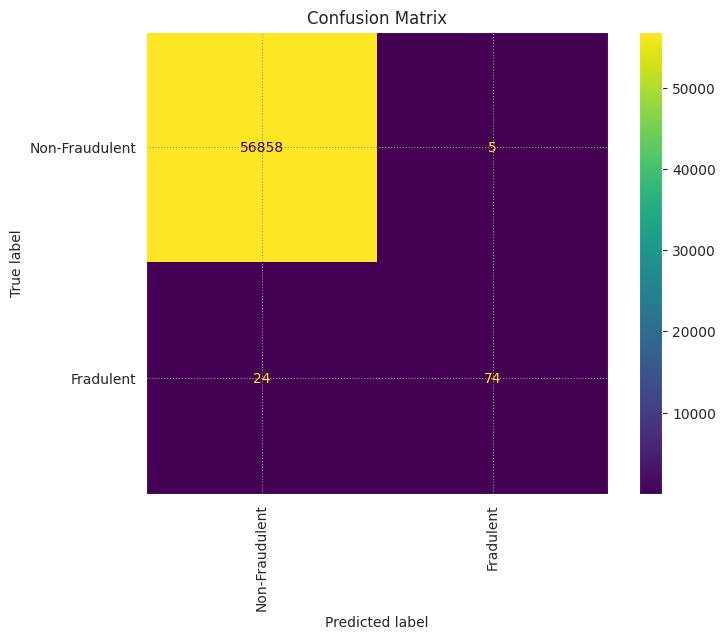

XGboost roc_value: 0.9844784474822587
XGBoost threshold: 2.2975023966864683e-05
ROC for the test dataset 98.4%


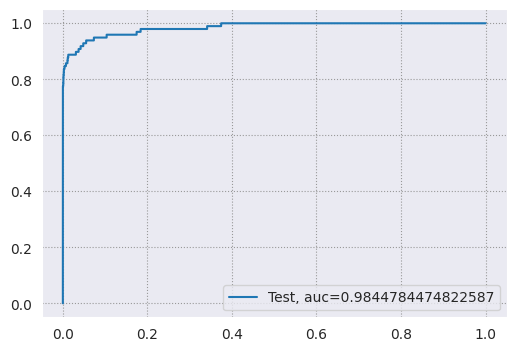

In [64]:
#Evaluate XGboost model
clf = XGBClassifier(random_state=42)
clf.fit(X_over, y_over)

# Accuracy score
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Prediction
y_pred = clf.predict(X_test)

print_classification_data(y_test, y_pred)

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))

fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)

threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Hyperparameter Tuning (XGBoost)

In [100]:
param_test = {
 'n_estimators':[100, 130, 150],
 'max_depth':[3, 4, 5],
 'min_child_weight':[2, 3, 4]
}
gsearch = model_selection.GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=np.nan, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, error_score="raise", refit=True)
gsearch.fit(X_over, y_over)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learni...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=3, max_leaves=None,
                                     min_child_weight=5, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=120,
                                     n_jobs=1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': [3, 4, 5], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [100, 130, 150]},
             scoring='roc_auc')

In [101]:
gsearch.best_params_

{'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 150}

In [102]:
gsearch.best_score_

0.9999094338084806

In [103]:
param_test = {
 'learning_rate':[0.05, 0.1, 0.125, 0.15, 0.2]
}
gsearch_lr = model_selection.GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=np.nan, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, error_score="raise", refit=True)
gsearch_lr.fit(X_over, y_over)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=5, max_leaves=None,
                                     min_child_weight=4, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2]},
             scoring='roc_auc')

In [104]:
gsearch_lr.best_params_

{'learning_rate': 0.2}

In [105]:
gsearch_lr.best_score_

0.9999384400778288

Model Accuracy: 0.9994733238531627
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961



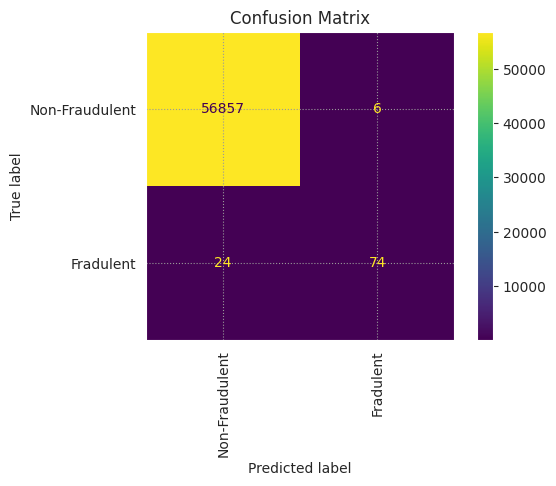

XGboost roc_value: 0.986410319539947
XGBoost threshold: 0.0005043313722126186
ROC for the test dataset 98.6%


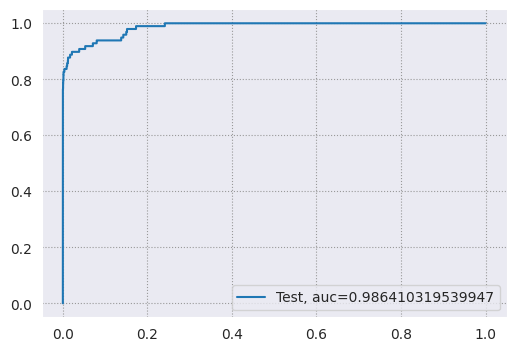

In [106]:
#Evaluate XGboost model
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=np.nan, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over)

# Accuracy score
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Prediction
y_pred = clf.predict(X_test)

print_classification_data(y_test, y_pred)

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))

fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)

threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Print the important features of the best model to understand the dataset

In [107]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Top var = 14
2nd Top var = 4
3rd Top var = 12


In [110]:
# Calculate roc auc
XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
print("roc_value: {0}" .format(XGB_roc_value))

fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)

print("fpr: {0}".format(fpr))
print("tpr: {0}".format(tpr))

threshold = thresholds[np.argmax(tpr-fpr)]
print("threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

roc_value: 0.986410319539947
fpr: [0.         0.         0.         ... 0.99945483 0.99949    1.        ]
tpr: [0.         0.01020408 0.02040816 ... 1.         1.         1.        ]
threshold: 0.0005043313722126186
ROC for the test dataset 98.6%
